# Welcome to Chris Wilson Machine learning Jupyter Notebook for the Ames Iowa Data Set
# The Next Code imports all the libraries I use


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SequentialFeatureSelector
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
import xgboost as xgb
from sklearn.linear_model import Ridge, Lasso
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from tensorflow.keras.optimizers import Adam, RMSprop
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant



### The following code creates a linear regression on the data using 7 quantitative features and then print the train and test R^2 scores

/var/folders/tc/54b4pvwj76q1zqy8qd633vf40000gn/T/ipykernel_2112/3081089929.py:2: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_data = pd.read_csv('Ames Real Estate Data.csv')


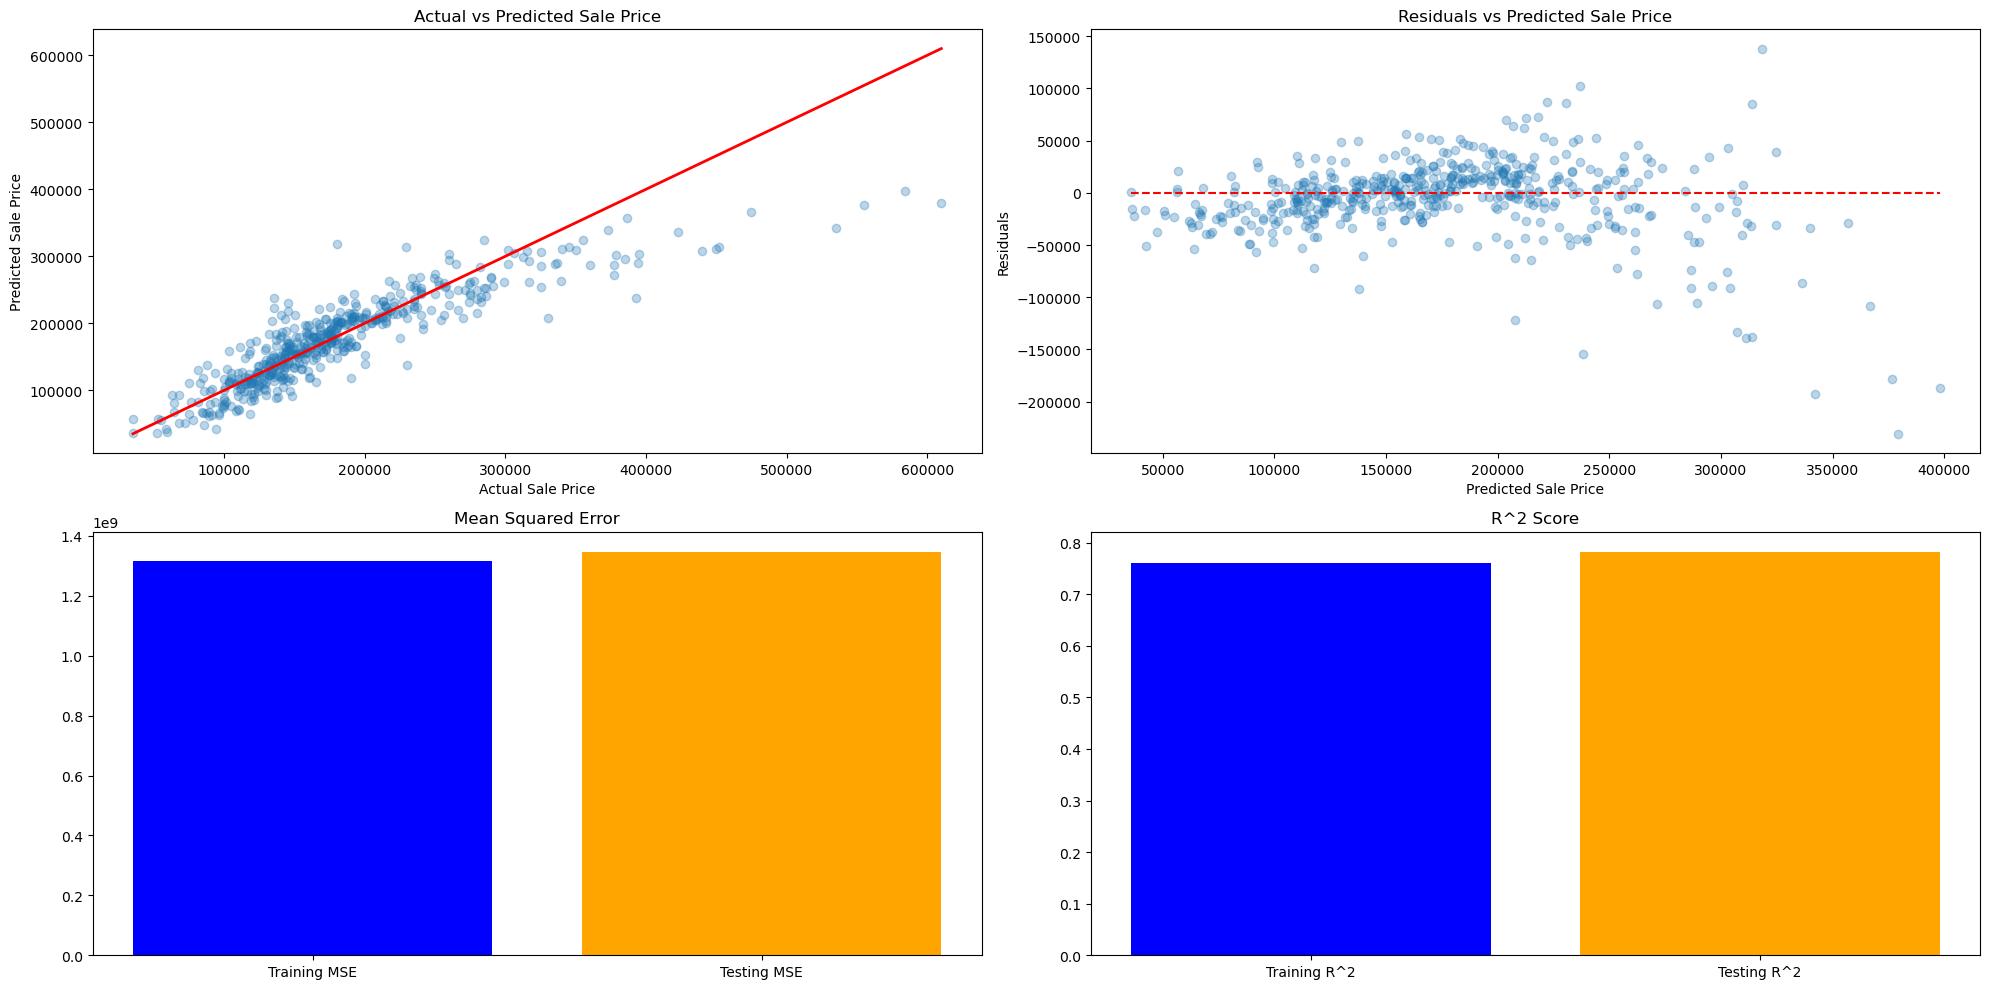

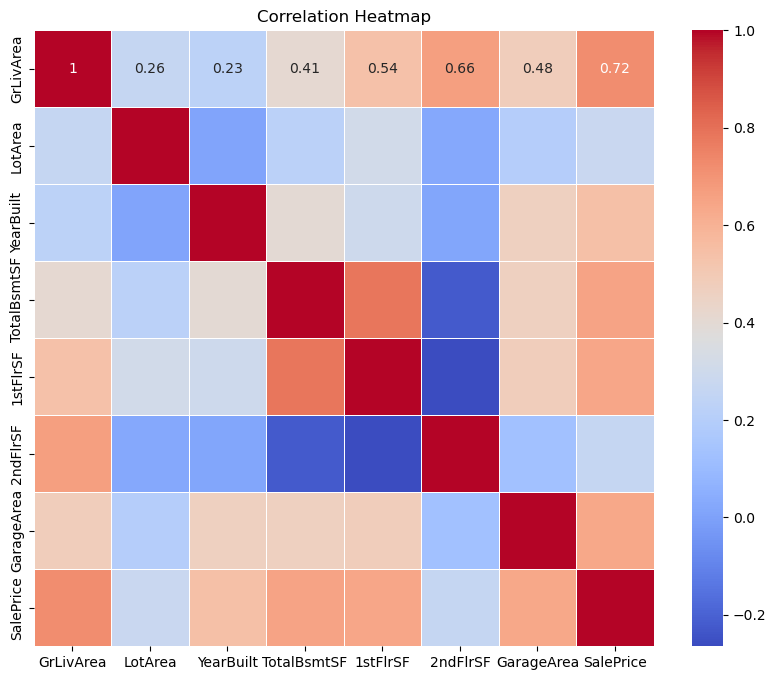

0.7602686800050097
0.7821845251585298


In [3]:
# Load the two CSV files
real_estate_data = pd.read_csv('Ames Real Estate Data.csv')
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Display the first few rows of each dataframe to understand their structure
real_estate_data_head = real_estate_data.head()
house_price_data_head = house_price_data.head()

real_estate_data_head, house_price_data_head


# Prepare the data
# Selecting a subset of features and target variable for simplicity
features = ['GrLivArea', 'LotArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea']
target = 'SalePrice'

# Drop rows with missing values
house_price_data_clean = house_price_data[features + [target]].dropna()

# Split the data into training and testing sets
X = house_price_data_clean[features]
y = house_price_data_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Prepare data for heatmap
correlation_matrix = house_price_data_clean.corr()

# Create the plots
plt.figure(figsize=(20, 10))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')

# Residual plot
plt.subplot(2, 2, 2)
plt.scatter(y_test_pred, y_test_pred - y_test, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')

# MSE bar plot
plt.subplot(2, 2, 3)
mse_values = [mse_train, mse_test]
mse_labels = ['Training MSE', 'Testing MSE']
plt.bar(mse_labels, mse_values, color=['blue', 'orange'])
plt.title('Mean Squared Error')

# R^2 bar plot
plt.subplot(2, 2, 4)
r2_values = [r2_train, r2_test]
r2_labels = ['Training R^2', 'Testing R^2']
plt.bar(r2_labels, r2_values, color=['blue', 'orange'])
plt.title('R^2 Score')

plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

print(r2_train)
print(r2_test)


## The following code creates a polynomial regression to see if we can increase test R^2 from .78

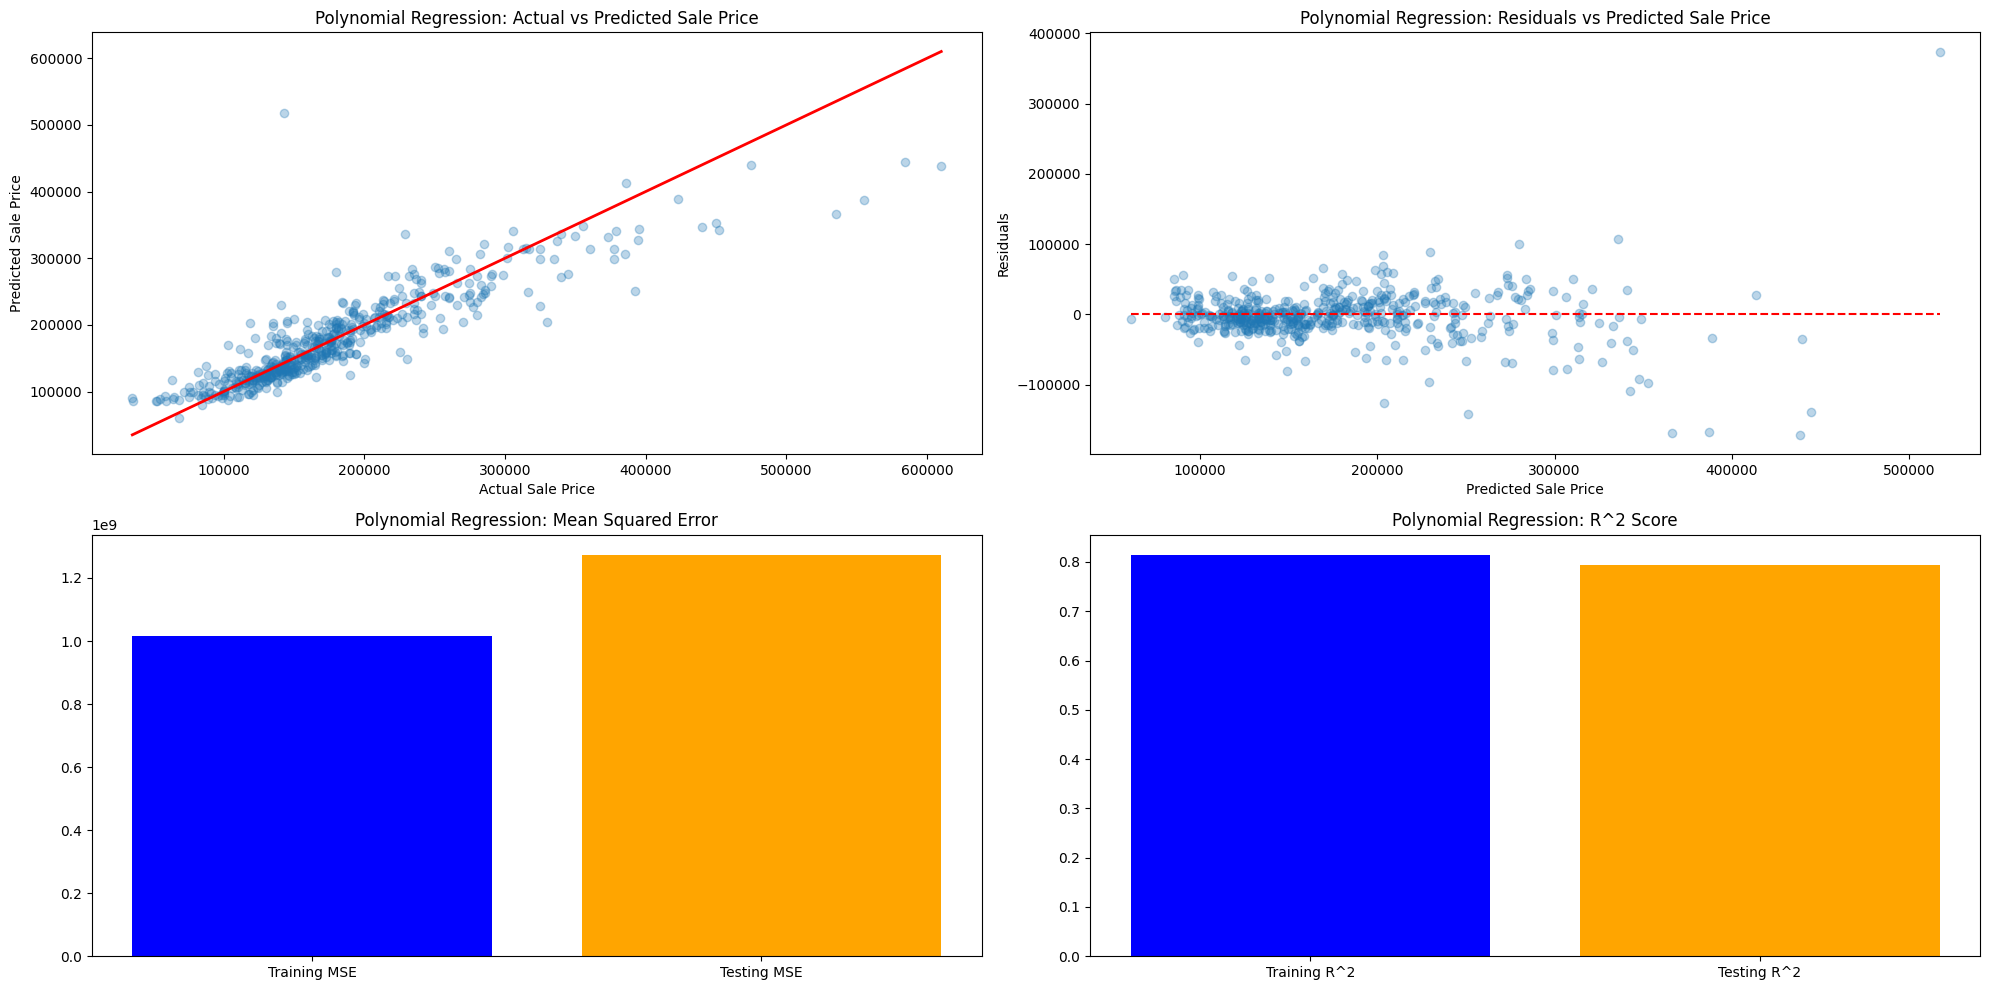

0.8147270147001214
0.794065300255798


In [ ]:


# Fit a polynomial regression model (degree 2 for simplicity)
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Make predictions
y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Calculate metrics
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Create the plots
plt.figure(figsize=(20, 10))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred_poly, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Polynomial Regression: Actual vs Predicted Sale Price')

# Residual plot
plt.subplot(2, 2, 2)
plt.scatter(y_test_pred_poly, y_test_pred_poly - y_test, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred_poly.min(), xmax=y_test_pred_poly.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Polynomial Regression: Residuals vs Predicted Sale Price')

# MSE bar plot
plt.subplot(2, 2, 3)
mse_values_poly = [mse_train_poly, mse_test_poly]
mse_labels_poly = ['Training MSE', 'Testing MSE']
plt.bar(mse_labels_poly, mse_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: Mean Squared Error')

# R^2 bar plot
plt.subplot(2, 2, 4)
r2_values_poly = [r2_train_poly, r2_test_poly]
r2_labels_poly = ['Training R^2', 'Testing R^2']
plt.bar(r2_labels_poly, r2_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: R^2 Score')

plt.tight_layout()
plt.show()
print(r2_train_poly)
print(r2_test_poly)


## Above R^2 is .79 only a slight increase from the linear regression

## Below is a 3rd degree polynomial regression, see how the test score dramatically increases but the R^2 is severely negative due to a process called overfitting

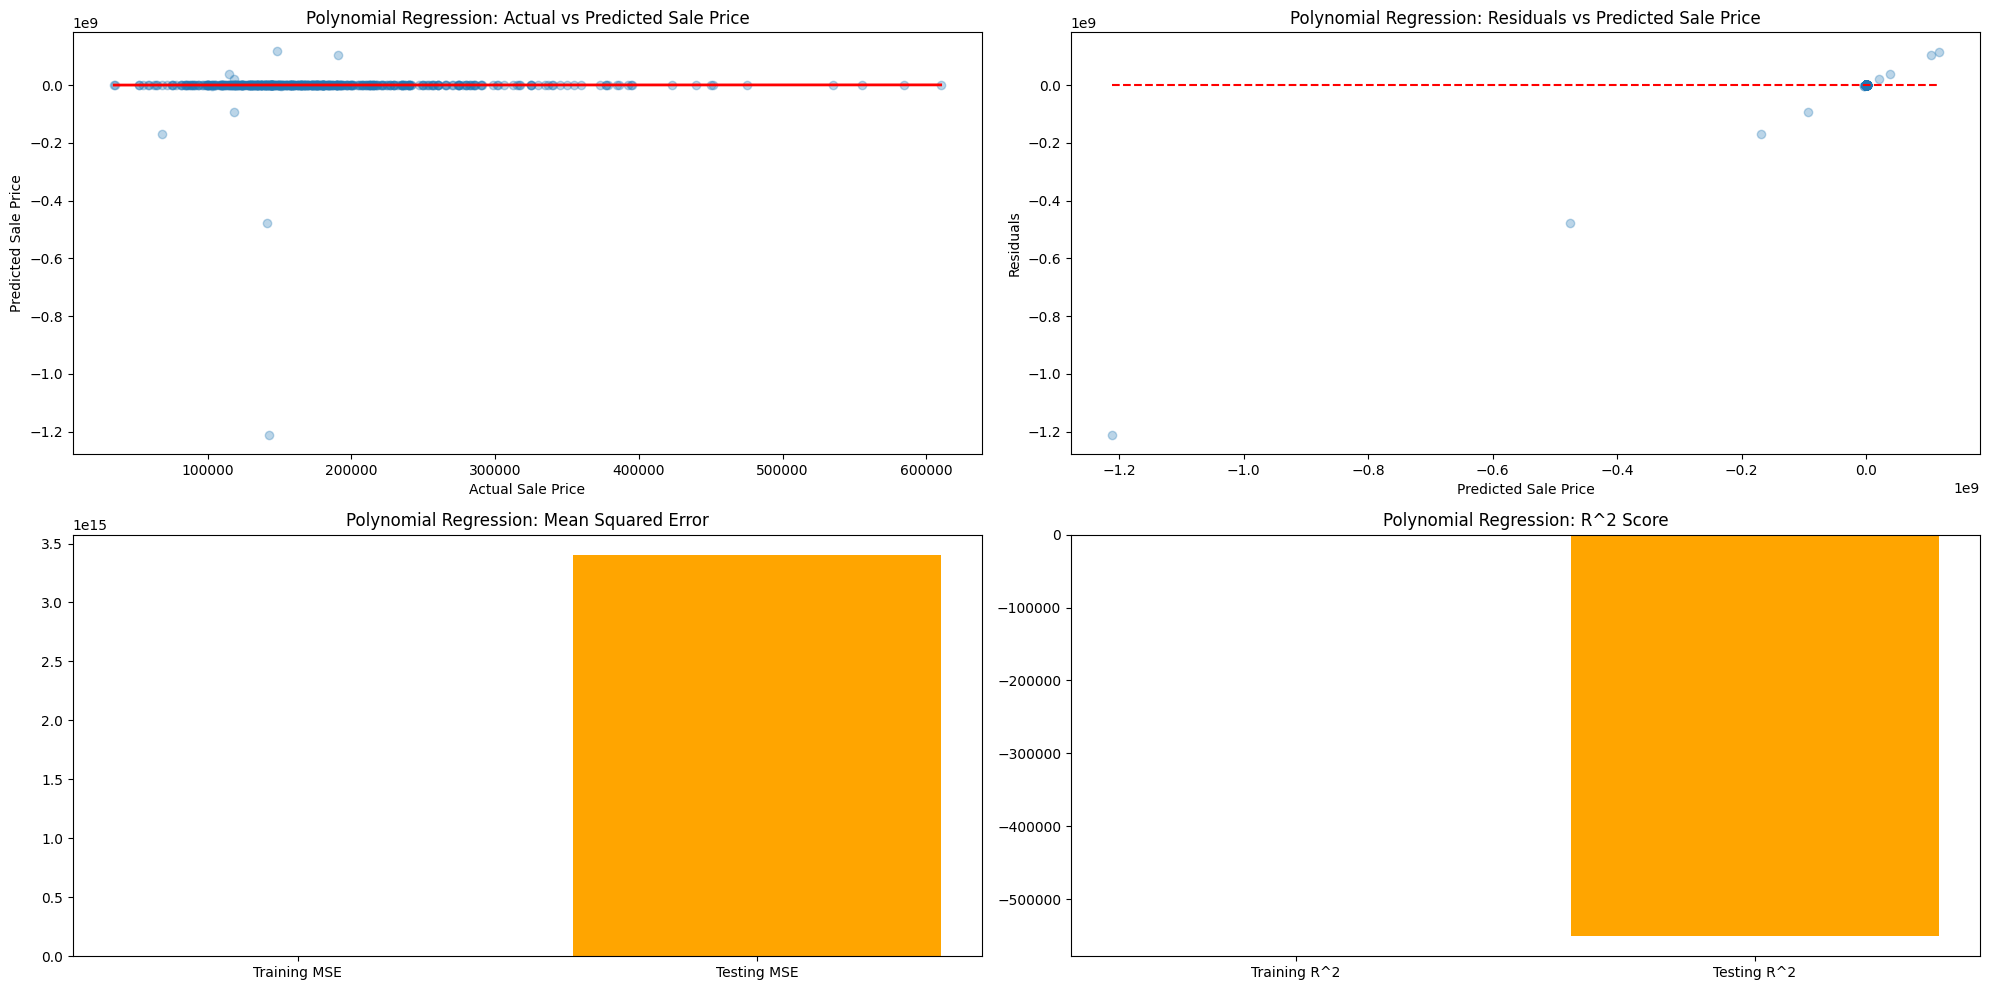

0.867353835864601
-550539.2725510775


In [ ]:
# Fit a polynomial regression model (degree 3)
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Make predictions
y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Calculate metrics
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Create the plots
plt.figure(figsize=(20, 10))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred_poly, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Polynomial Regression: Actual vs Predicted Sale Price')

# Residual plot
plt.subplot(2, 2, 2)
plt.scatter(y_test_pred_poly, y_test_pred_poly - y_test, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred_poly.min(), xmax=y_test_pred_poly.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Polynomial Regression: Residuals vs Predicted Sale Price')

# MSE bar plot
plt.subplot(2, 2, 3)
mse_values_poly = [mse_train_poly, mse_test_poly]
mse_labels_poly = ['Training MSE', 'Testing MSE']
plt.bar(mse_labels_poly, mse_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: Mean Squared Error')

# R^2 bar plot
plt.subplot(2, 2, 4)
r2_values_poly = [r2_train_poly, r2_test_poly]
r2_labels_poly = ['Training R^2', 'Testing R^2']
plt.bar(r2_labels_poly, r2_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: R^2 Score')

plt.tight_layout()
plt.show()

print(r2_train_poly)
print(r2_test_poly)

## The following is several plots displaying information about the residuals

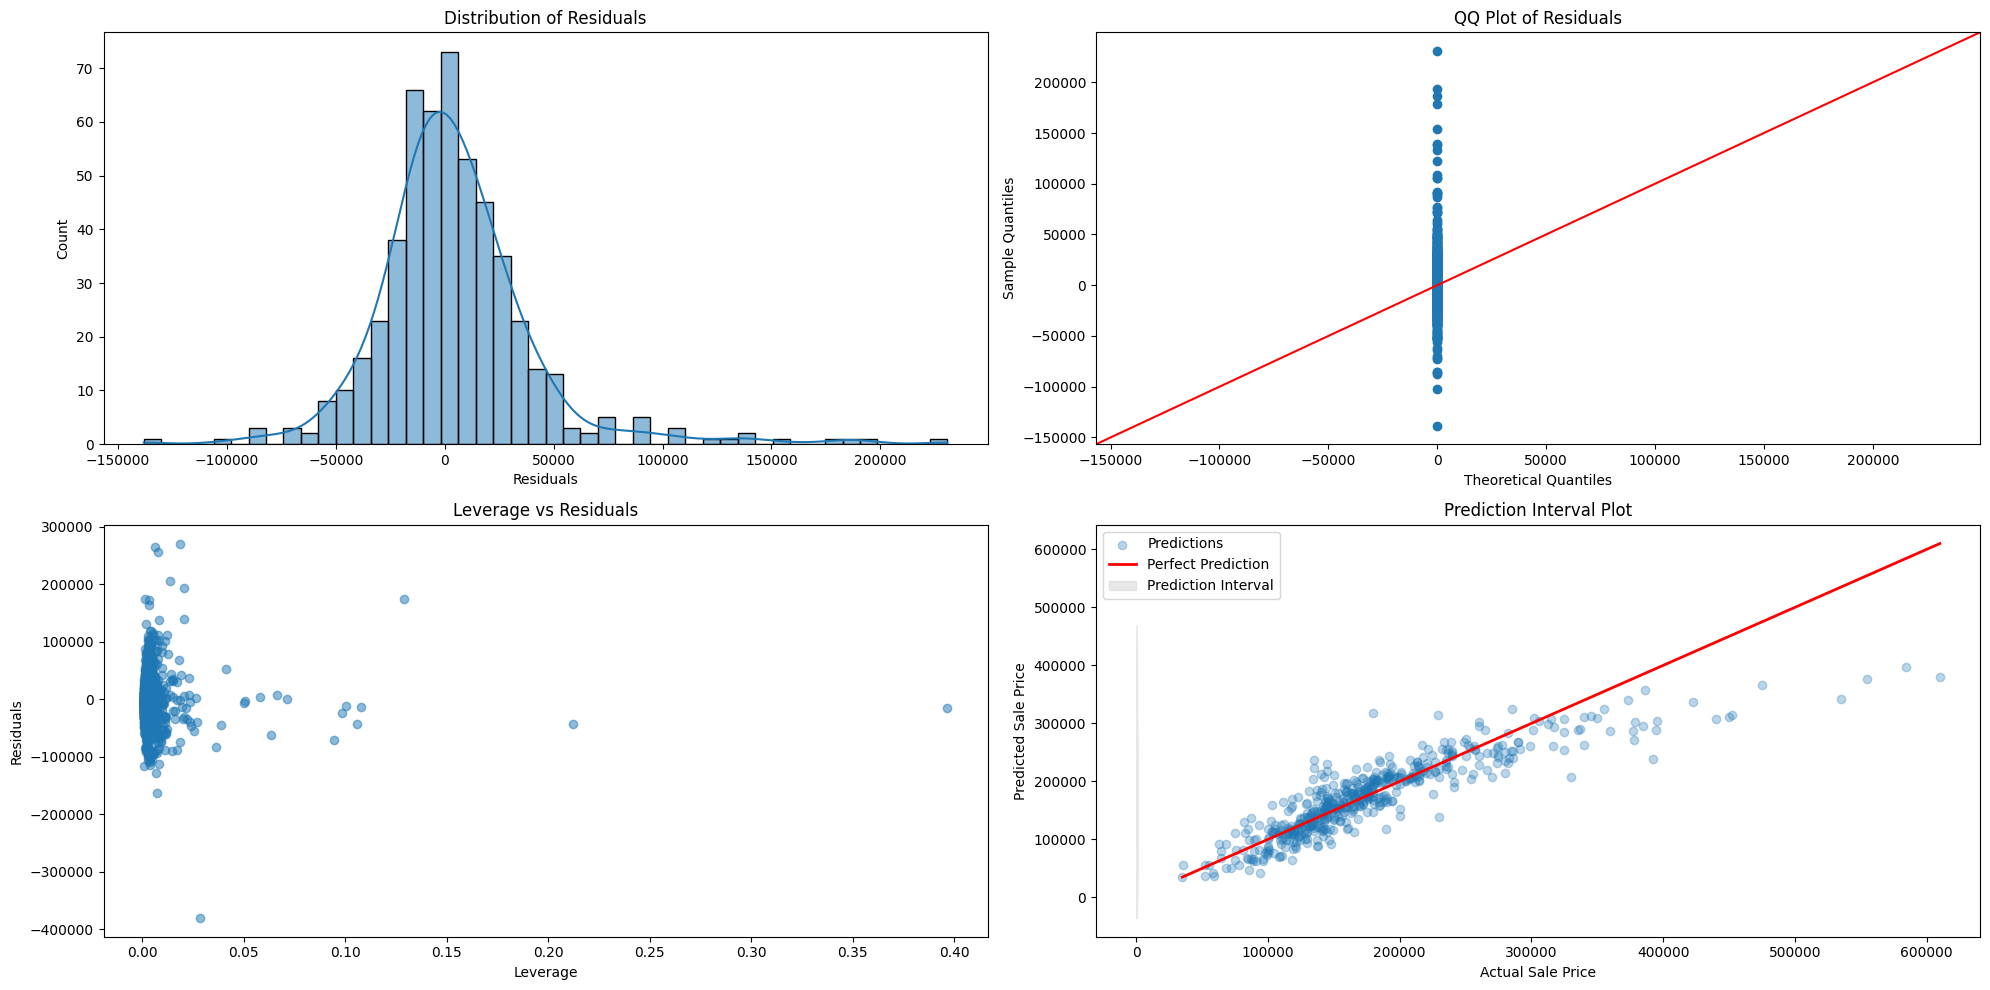

In [ ]:


# Residuals
residuals = y_test - y_test_pred

# Leverage values for training data
model_with_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, model_with_const).fit()
influence = ols_model.get_influence()
leverage_train = influence.hat_matrix_diag[:len(y_train)]
residuals_train = y_train - y_train_pred

plt.figure(figsize=(20, 10))

# Distribution of Residuals
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

# QQ Plot
plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='45', ax=plt.gca())
plt.title('QQ Plot of Residuals')

# Leverage vs Residuals
plt.subplot(2, 2, 3)
plt.scatter(leverage_train, residuals_train, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Leverage vs Residuals')

# Prediction Interval Plot
plt.subplot(2, 2, 4)
preds_interval = np.array([y_test_pred - 1.96 * np.std(residuals), y_test_pred + 1.96 * np.std(residuals)])
plt.scatter(y_test, y_test_pred, alpha=0.3, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.fill_between(np.arange(len(y_test)), preds_interval[0], preds_interval[1], color='lightgrey', alpha=0.5, label='Prediction Interval')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Prediction Interval Plot')
plt.legend()

plt.tight_layout()
plt.show()


## The following is a Variance inflaton factor bar chart which shows the VIF so several features

<ipython-input-26-6cb101133fe4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')


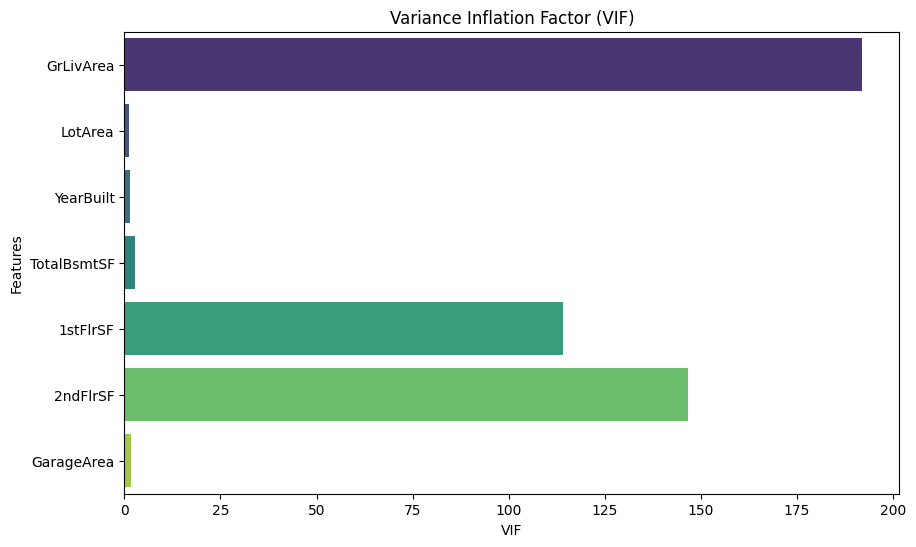

Feature         VIF
0    GrLivArea  192.036309
1      LotArea    1.157193
2    YearBuilt    1.403417
3  TotalBsmtSF    2.706926
4     1stFlrSF  114.071186
5     2ndFlrSF  146.576640
6   GarageArea    1.633075

In [ ]:

# Calculate VIF for each feature
X_train_const = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i+1) for i in range(len(X_train.columns))]

# Plot VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF)')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.show()

vif_data

## The following is a 3d scatter plot showing the features general living area and basement square footage related to price with a regression plane.

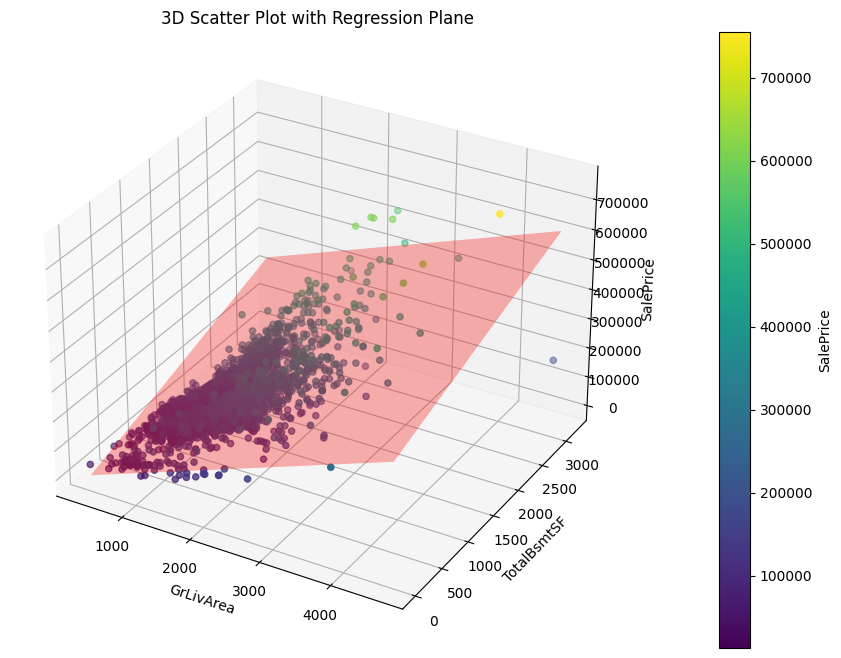

In [ ]:


# Ensuring the correct dataframe and column names are used
house_price_data_clean_renamed = house_price_data_clean.rename(columns={
    '1stFlrSF': 'FirstFlrSF',
    '2ndFlrSF': 'SecondFlrSF'
})

# Update variable names to match renamed columns
x_var = 'GrLivArea'
y_var = 'TotalBsmtSF'
z_var = 'SalePrice'

# Fit a 3D linear regression model
X_3d = house_price_data_clean_renamed[[x_var, y_var]]
X_3d = sm.add_constant(X_3d)  # Add a constant term for the intercept
y_3d = house_price_data_clean_renamed[z_var]
model_3d = sm.OLS(y_3d, X_3d).fit()

# Create a grid of values for the independent variables
x_surf, y_surf = np.meshgrid(np.linspace(X_3d[x_var].min(), X_3d[x_var].max(), 100),
                             np.linspace(X_3d[y_var].min(), X_3d[y_var].max(), 100))

# Predict values for the grid
exog = pd.DataFrame({x_var: x_surf.ravel(), y_var: y_surf.ravel()})
exog = sm.add_constant(exog)
fittedY = model_3d.predict(exog).values.reshape(x_surf.shape)

# Plot the 3D scatter plot with the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(house_price_data_clean_renamed[x_var], house_price_data_clean_renamed[y_var], house_price_data_clean_renamed[z_var], c=house_price_data_clean_renamed[z_var], cmap='viridis', marker='o')

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, rstride=100, cstride=100)

ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title('3D Scatter Plot with Regression Plane')

# Adding a color bar to indicate SalePrice
color_bar = plt.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('SalePrice')

plt.show()


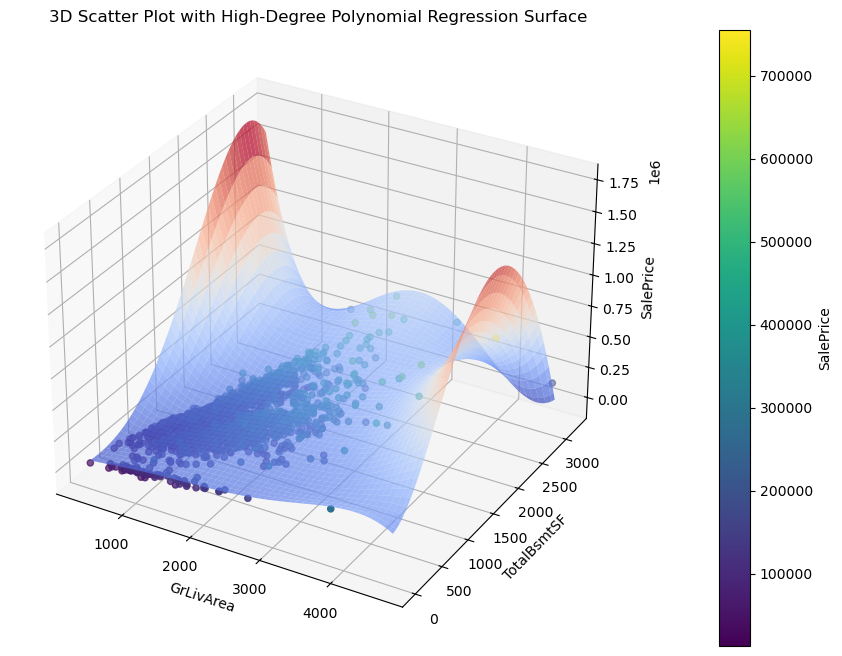

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import cm
# Ensuring the correct dataframe and column names are used
house_price_data_clean_renamed = house_price_data_clean.rename(columns={
    '1stFlrSF': 'FirstFlrSF',
    '2ndFlrSF': 'SecondFlrSF'
})

# Update variable names to match renamed columns
x_var = 'GrLivArea'
y_var = 'TotalBsmtSF'
z_var = 'SalePrice'

# Prepare the data
X = house_price_data_clean_renamed[[x_var, y_var]]
y = house_price_data_clean_renamed[z_var]

# Fit a polynomial regression model with a higher degree
poly = PolynomialFeatures(degree=5)  # Increase degree for a more "wiggly" spline
X_poly = poly.fit_transform(X)

model_poly = LinearRegression().fit(X_poly, y)

# Create a grid of values for the independent variables
x_surf, y_surf = np.meshgrid(np.linspace(X[x_var].min(), X[x_var].max(), 100),
                             np.linspace(X[y_var].min(), X[y_var].max(), 100))

# Predict values for the grid
exog = pd.DataFrame({x_var: x_surf.ravel(), y_var: y_surf.ravel()})
exog_poly = poly.transform(exog)
fittedY = model_poly.predict(exog_poly).reshape(x_surf.shape)

# Plot the 3D scatter plot with the regression surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[x_var], X[y_var], y, c=y, cmap='viridis', marker='o')

# Plot the regression surface
ax.plot_surface(x_surf, y_surf, fittedY, cmap=cm.coolwarm, alpha=0.7)

ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title('3D Scatter Plot with High-Degree Polynomial Regression Surface')

# Adding a color bar to indicate SalePrice
color_bar = plt.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('SalePrice')

plt.show()


## The following is the same scatterplot without the regression plane

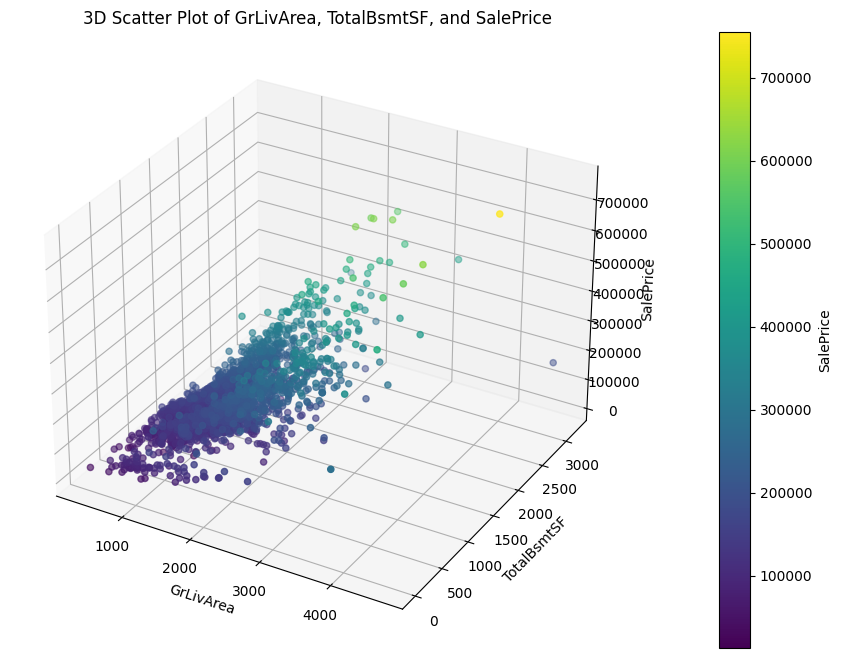

In [ ]:
# Create 3D scatter plot without the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(house_price_data_clean_renamed[x_var], house_price_data_clean_renamed[y_var], house_price_data_clean_renamed[z_var], c=house_price_data_clean_renamed[z_var], cmap='viridis', marker='o')

ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title('3D Scatter Plot of GrLivArea, TotalBsmtSF, and SalePrice')

# Adding a color bar to indicate SalePrice
color_bar = plt.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('SalePrice')

plt.show()


## The following two cells deal with the importance factor of the feautures

In [ ]:


# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Identify numeric columns
numeric_cols = house_price_data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix using only numeric columns
corr_matrix = house_price_data[numeric_cols].corr()

# Select features with high correlation to the target variable (SalePrice)
high_corr_features = corr_matrix.index[corr_matrix['SalePrice'].abs() > 0.5].tolist()
high_corr_features.remove('SalePrice')  # Remove the target variable itself

# Subset the data with the selected high correlation features
features_high_corr = house_price_data[high_corr_features]
target = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_high_corr_encoded = pd.get_dummies(features_high_corr, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_high_corr_imputed = imputer.fit_transform(features_high_corr_encoded)

# Define the linear regression model
lr_model = LinearRegression()

# Define the forward selection feature selector
sfs_forward_high_corr = SequentialFeatureSelector(lr_model, direction='forward', n_features_to_select='auto')

# Fit the feature selector
sfs_forward_high_corr.fit(features_high_corr_imputed, target)

# Get the selected features
selected_features_forward_high_corr = features_high_corr_encoded.columns[sfs_forward_high_corr.get_support()]

selected_features_forward_high_corr



Index(['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GarageArea'], dtype='object')

<ipython-input-30-e6018fd3859f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


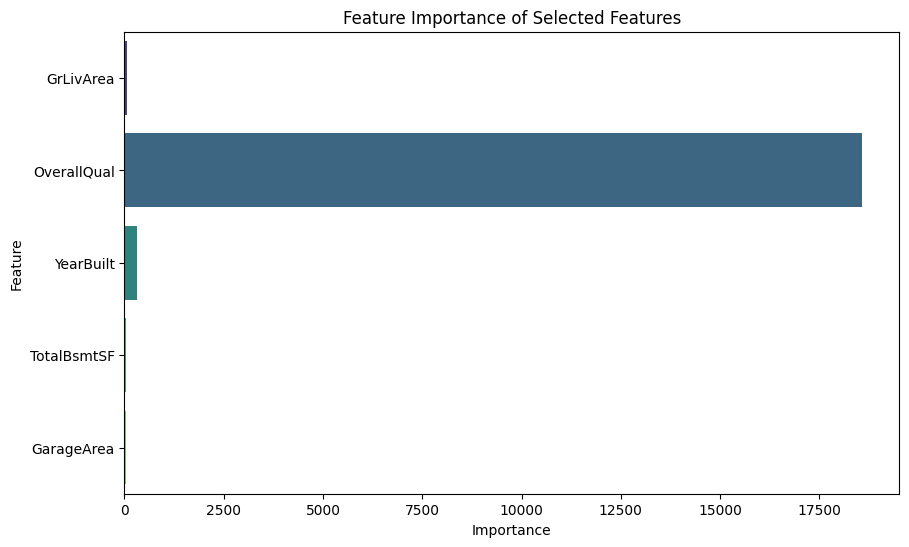

In [ ]:

# Fit the linear regression model on the selected features
selected_features_data = features_high_corr_encoded[selected_features_forward_high_corr]
model = LinearRegression()
# Fit the linear regression model on the selected features after handling missing values
selected_features_data_imputed = imputer.fit_transform(selected_features_data)
model.fit(selected_features_data_imputed, target)

# Get the coefficients
coefficients = model.coef_

# Create a DataFrame for the feature importance
feature_importance = pd.DataFrame({'Feature': selected_features_forward_high_corr, 'Importance': coefficients})

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance of Selected Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## The following cell computes the MSE and R^2 based on the importance of the features, notice how we get a .80 score using simple linear regression an increase from .78 before

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_data_imputed, target, test_size=0.2, random_state=42)

# Train the linear regression model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(1228464786.2957494, 0.8003044188963822)

## The following is a graph of actual vs predicted sales price on the new linear model

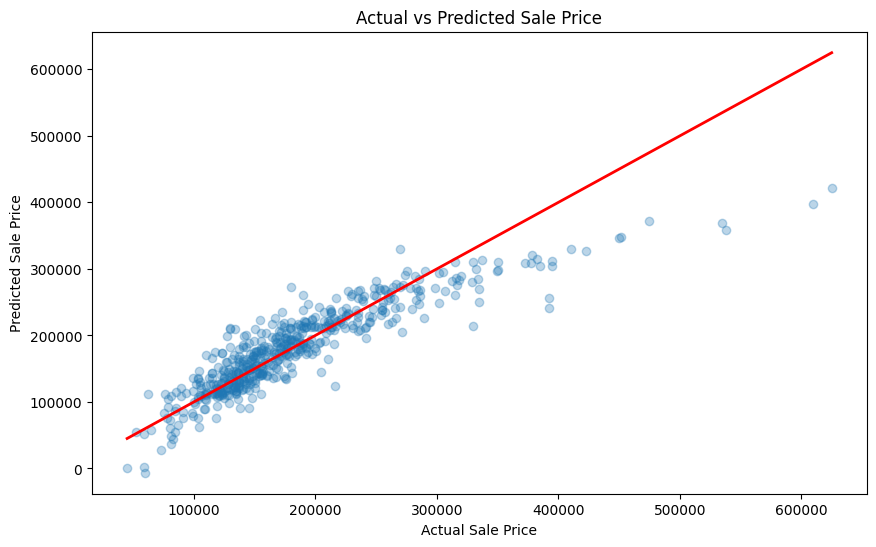

In [ ]:
# Plotting the model predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

## The following creates dummy variables for the categorical data in the Ames data set, using a process called one hot encoding.

In [ ]:
# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Train the linear regression model on the full dataset
model.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_all = model.predict(X_test_all)

# Calculate performance metrics
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)

mse_all, r2_all


(534366722.1516839, 0.91313493533316)

# Notice how the R^2 has increased to .91

# The Following 2 cells are plots that show the actual vs predicted price and the residuals for the full data set

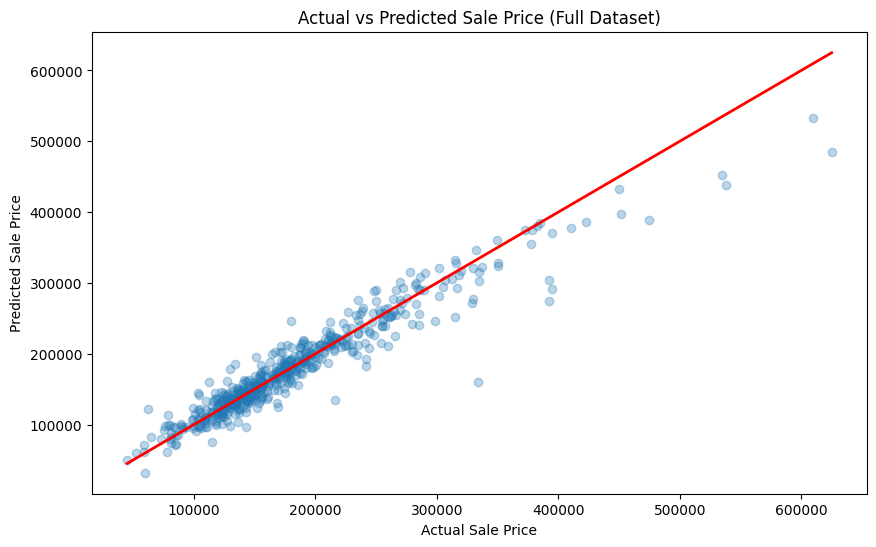

In [ ]:
# Plotting the model predictions vs actual values for the full dataset model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_all, alpha=0.3)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Full Dataset)')
plt.show()

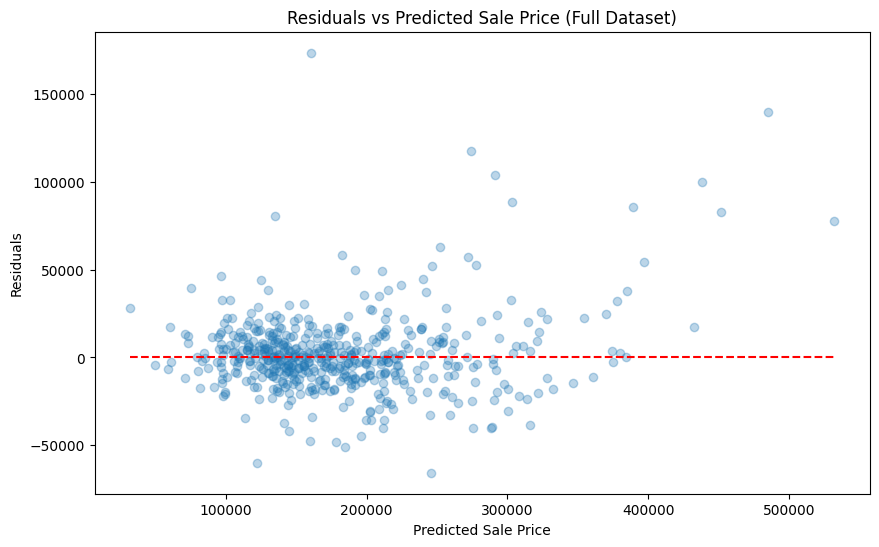

In [ ]:
# Calculate the residuals
residuals = y_test_all - y_pred_all

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_all, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_all.min(), xmax=y_pred_all.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price (Full Dataset)')
plt.show()


# The following cell compares Support Vector Regressors, Random Forest and linear regressions

In [ ]:


# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Define the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')

# Train the models on the full dataset
linear_model.fit(X_train_all, y_train_all)
random_forest_model.fit(X_train_all, y_train_all)
svr_model.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test_all)
y_pred_rf = random_forest_model.predict(X_test_all)
y_pred_svr = svr_model.predict(X_test_all)

# Calculate performance metrics
mse_linear = mean_squared_error(y_test_all, y_pred_linear)
r2_linear = r2_score(y_test_all, y_pred_linear)
mae_linear = mean_absolute_error(y_test_all, y_pred_linear)

mse_rf = mean_squared_error(y_test_all, y_pred_rf)
r2_rf = r2_score(y_test_all, y_pred_rf)
mae_rf = mean_absolute_error(y_test_all, y_pred_rf)

mse_svr = mean_squared_error(y_test_all, y_pred_svr)
r2_svr = r2_score(y_test_all, y_pred_svr)
mae_svr = mean_absolute_error(y_test_all, y_pred_svr)

performance_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Regression'],
    'MSE': [mse_linear, mse_rf, mse_svr],
    'R^2': [r2_linear, r2_rf, r2_svr],
    'MAE': [mae_linear, mae_rf, mae_svr]
})

print(performance_comparison)


                       Model           MSE       R^2           MAE
0          Linear Regression  5.343667e+08  0.913135  14712.850884
1              Random Forest  6.514445e+08  0.894103  15963.918275
2  Support Vector Regression  6.725165e+09 -0.093223  55020.103473


# Notice how the SVR has a negative R^2 and the random forest has an R^2 of .89 close to linear regression

# The following shows a decision tree regressor on the most significant feature overall quality

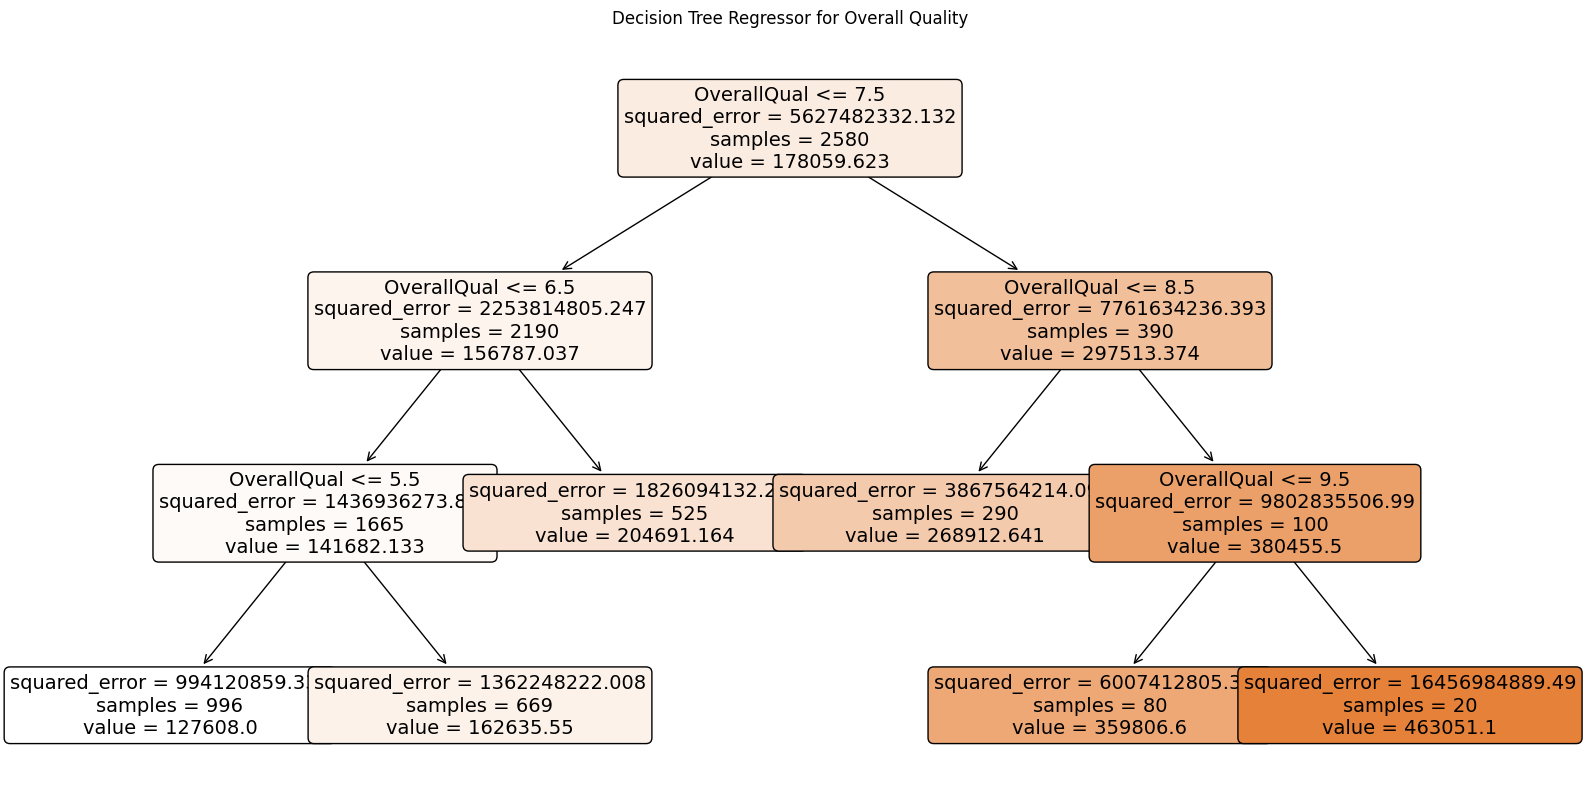

In [ ]:


# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Fit a Decision Tree model on the 'OverallQual' feature
X_overall_qual = house_price_data[['OverallQual']]
y = house_price_data['SalePrice']

# Initialize and fit the Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_overall_qual, y)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=['OverallQual'], filled=True, rounded=True, fontsize=14)
plt.title('Decision Tree Regressor for Overall Quality')
plt.show()


# The following shows that same decision tree regressors plot against the sale price and overall quality.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


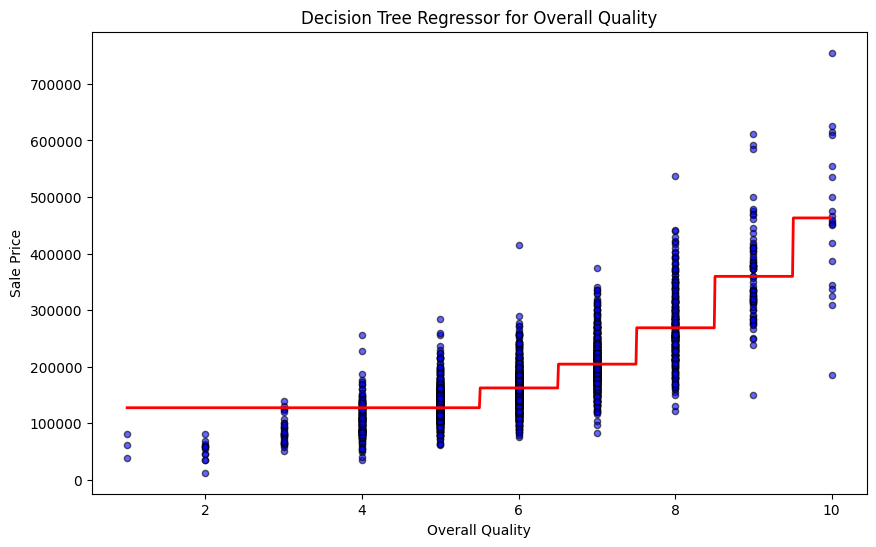

In [ ]:
# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Prepare data for plotting
X = house_price_data[['OverallQual']]
y = house_price_data['SalePrice']

# Fit the decision tree regressor
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X, y)

# Generate a grid of values for OverallQual
qual_grid = np.arange(X['OverallQual'].min(), X['OverallQual'].max(), 0.01).reshape(-1, 1)
price_pred = tree_model.predict(qual_grid)

# Plot the tree decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=20, edgecolor='k', alpha=0.6)
plt.plot(qual_grid, price_pred, color='red', linewidth=2)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regressor for Overall Quality')
plt.show()


# The following shows the graph and R^2 of Kaggles favorite method other than deep learning XGBoost

MSE: 570791479.6389883
R^2: 0.9072138351159378


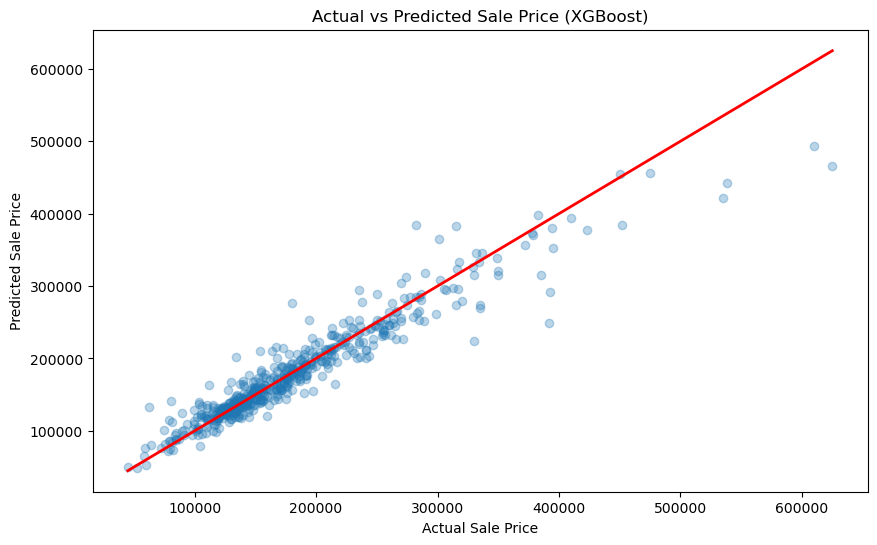

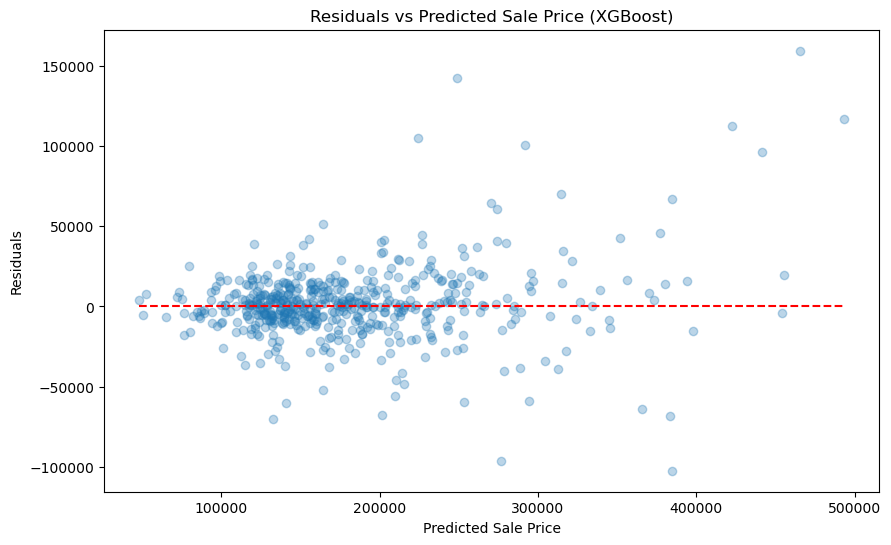

In [11]:


# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost regressor
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgboost_model.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_xgb = xgboost_model.predict(X_test_all)

# Calculate performance metrics
mse_xgb = mean_squared_error(y_test_all, y_pred_xgb)
r2_xgb = r2_score(y_test_all, y_pred_xgb)

print(f'MSE: {mse_xgb}')
print(f'R^2: {r2_xgb}')

# Plot actual vs predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_xgb, alpha=0.3)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (XGBoost)')
plt.show()

# Plot residuals
residuals = y_test_all - y_pred_xgb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_xgb.min(), xmax=y_pred_xgb.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price (XGBoost)')
plt.show()


# The following shows two penalized methods Ridge and Lasso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.3296e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression - MSE: 498440093.66112685, R^2: 0.9189750611825537


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.481e+11, tolerance: 1.133e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Regression - MSE: 528943590.22972333, R^2: 0.9140165035251333


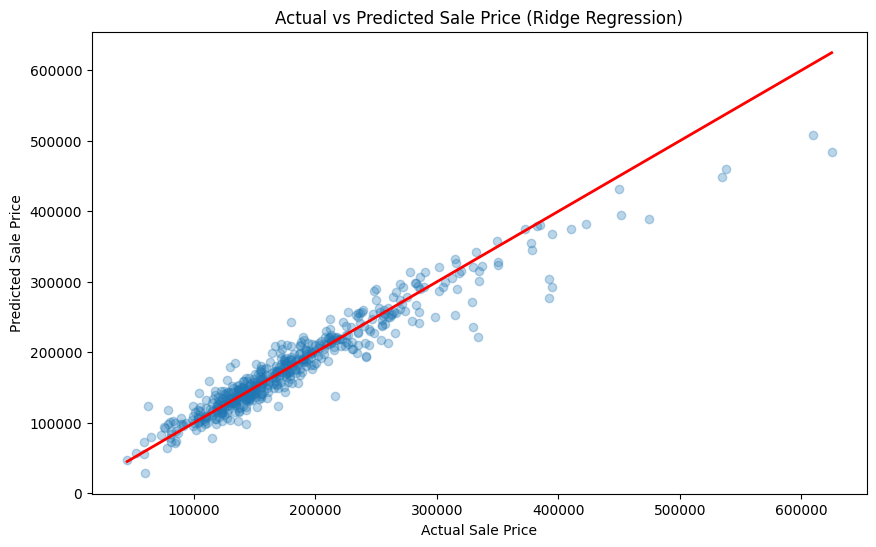

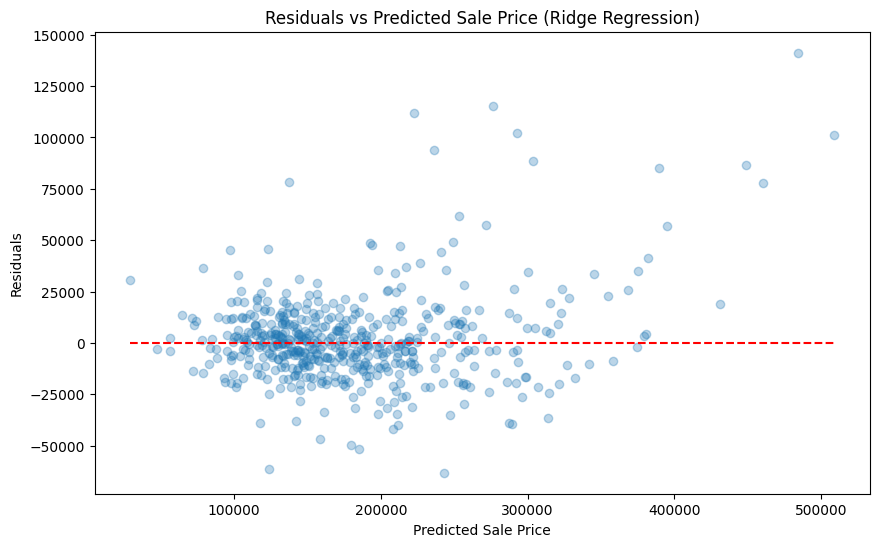

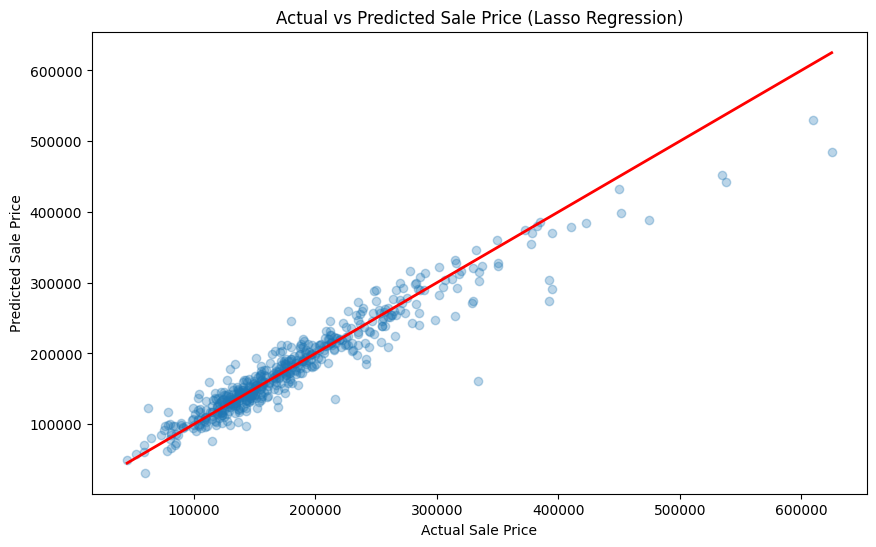

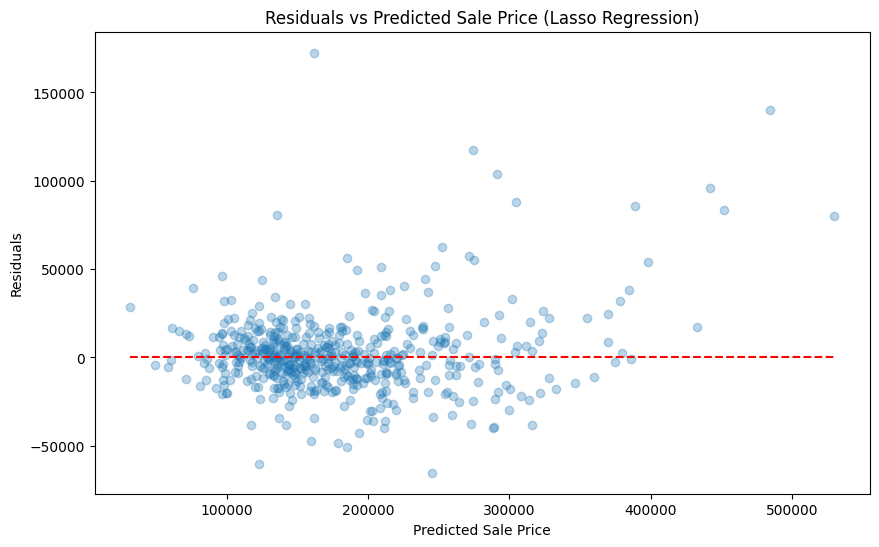

In [ ]:

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Initialize and fit the Ridge regressor
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_all, y_train_all)

# Make predictions on the test set for Ridge
y_pred_ridge = ridge_model.predict(X_test_all)

# Calculate performance metrics for Ridge
mse_ridge = mean_squared_error(y_test_all, y_pred_ridge)
r2_ridge = r2_score(y_test_all, y_pred_ridge)

print(f'Ridge Regression - MSE: {mse_ridge}, R^2: {r2_ridge}')

# Initialize and fit the Lasso regressor
lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_all, y_train_all)

# Make predictions on the test set for Lasso
y_pred_lasso = lasso_model.predict(X_test_all)

# Calculate performance metrics for Lasso
mse_lasso = mean_squared_error(y_test_all, y_pred_lasso)
r2_lasso = r2_score(y_test_all, y_pred_lasso)

print(f'Lasso Regression - MSE: {mse_lasso}, R^2: {r2_lasso}')

# Plot actual vs predicted sale prices for Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_ridge, alpha=0.3)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Ridge Regression)')
plt.show()

# Plot residuals for Ridge
residuals_ridge = y_test_all - y_pred_ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_ridge.min(), xmax=y_pred_ridge.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price (Ridge Regression)')
plt.show()

# Plot actual vs predicted sale prices for Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_lasso, alpha=0.3)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Lasso Regression)')
plt.show()

# Plot residuals for Lasso
residuals_lasso = y_test_all - y_pred_lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_lasso.min(), xmax=y_pred_lasso.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price (Lasso Regression)')
plt.show()


# Notice How ridge gets an R^2 score of .918 and Lasso Gets a R^2 score of .914 both perform slightly better than linear regression

# Now we turn to neual networks to see if we can increase R^2 score

# The following neural network uses adam as an optimizer and uses relu as the activation layer and gets an R^2 score of .73

Epoch 1/100


/Users/chriswilson/Desktop/ames/tf/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-10 15:04:55.556015: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-07-10 15:04:55.556042: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-07-10 15:04:55.556049: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-07-10 15:04:55.556091: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-10 15:04:55.556100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 37157220352.0000 - val_loss: 35773734912.0000
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38015811584.0000 - val_loss: 35717173248.0000
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38922502144.0000 - val_loss: 35510718464.0000
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36284043264.0000 - val_loss: 35030892544.0000
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35659272192.0000 - val_loss: 34176917504.0000
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35464396800.0000 - val_loss: 32866142208.0000
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32529915904.0000 - val_loss: 31063578624.0000
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30834837504.0000 - val_loss: 28751280128.0000
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29959788544.0000 - val_loss: 26065743872.0000
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 260789

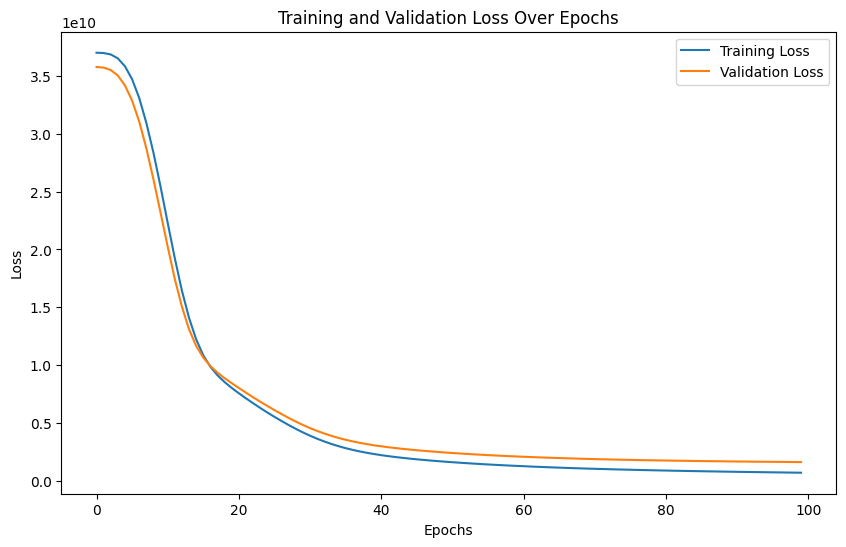

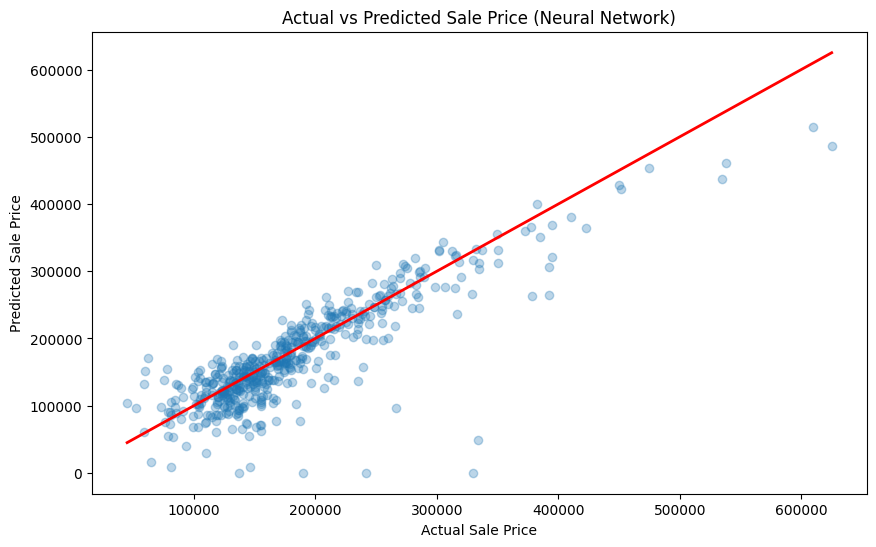

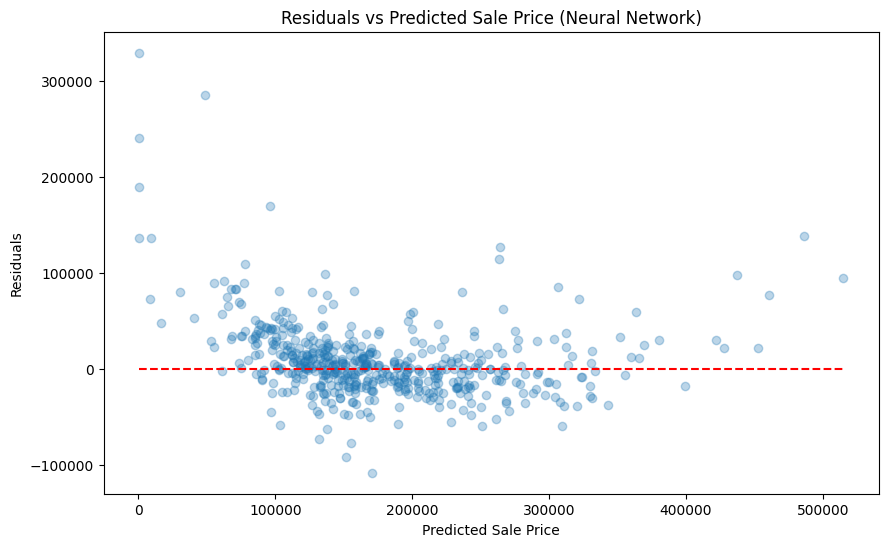

MSE: 1726994742.9230268
R^2: 0.7192648649215698


In [4]:


# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Scale the features
scaler = StandardScaler()
features_all_scaled = scaler.fit_transform(features_all_original_imputed)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_scaled, target_original, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_all.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_all, y_train_all, epochs=100, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred_nn = model.predict(X_test_all).flatten()

# Calculate performance metrics
mse_nn = mean_squared_error(y_test_all, y_pred_nn)
r2_nn = r2_score(y_test_all, y_pred_nn)

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Plot actual vs predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_nn, alpha=0.3)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Neural Network)')
plt.show()

# Plot residuals
residuals_nn = y_test_all - y_pred_nn
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn, residuals_nn, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_nn.min(), xmax=y_pred_nn.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price (Neural Network)')
plt.show()

print(f'MSE: {mse_nn}')
print(f'R^2: {r2_nn}')


# The following neural networks use several configurations and loop throught the configs to try and achieve a better model fit,

17/17 [==============================] - 0s 1ms/step
Configuration 1: {'layers': [64, 64], 'activation': 'relu', 'optimizer': 'adam'}
MSE: 1694057963.773137, R^2: 0.7246189770575611



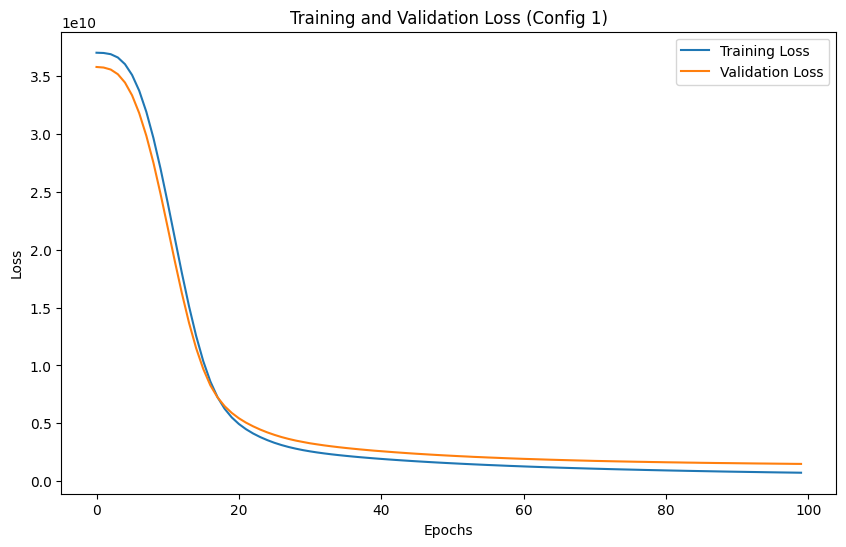

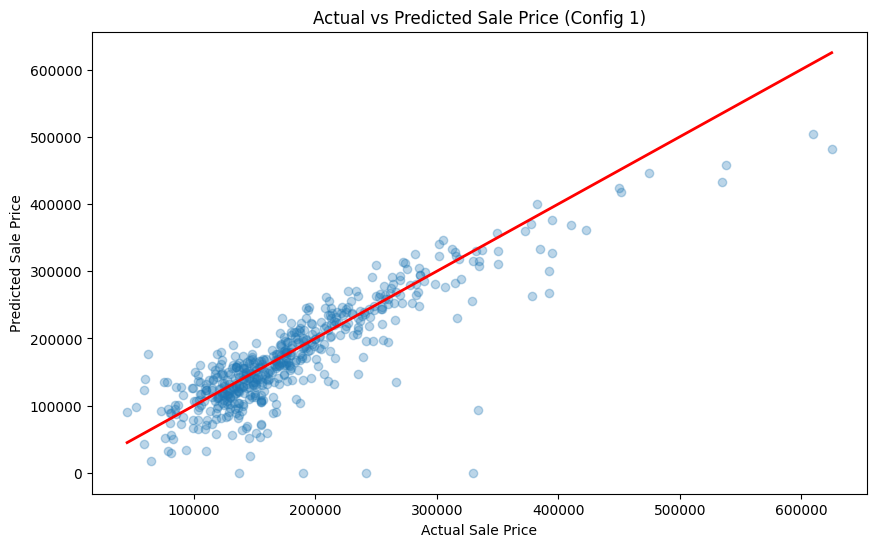

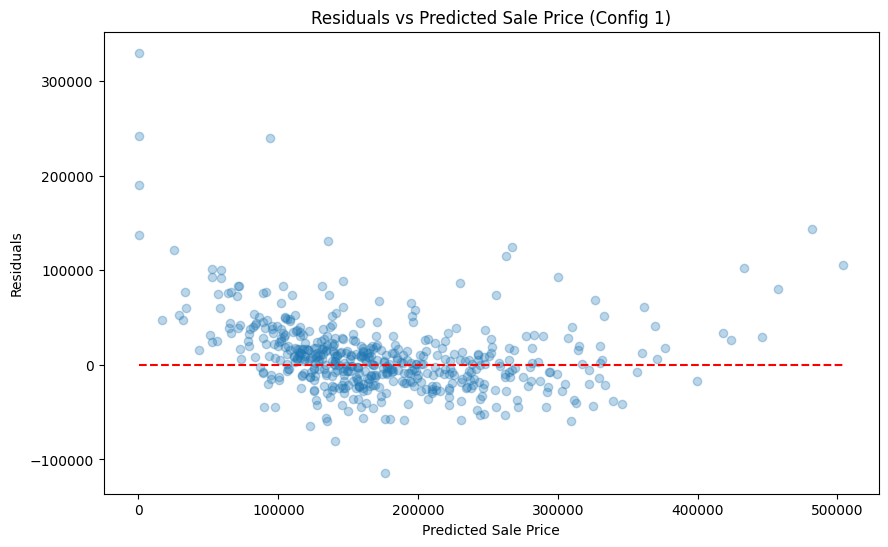

Configuration 2: {'layers': [128, 64, 32], 'activation': 'relu', 'optimizer': 'adam'}
MSE: 1235775676.1199553, R^2: 0.7991159823957059



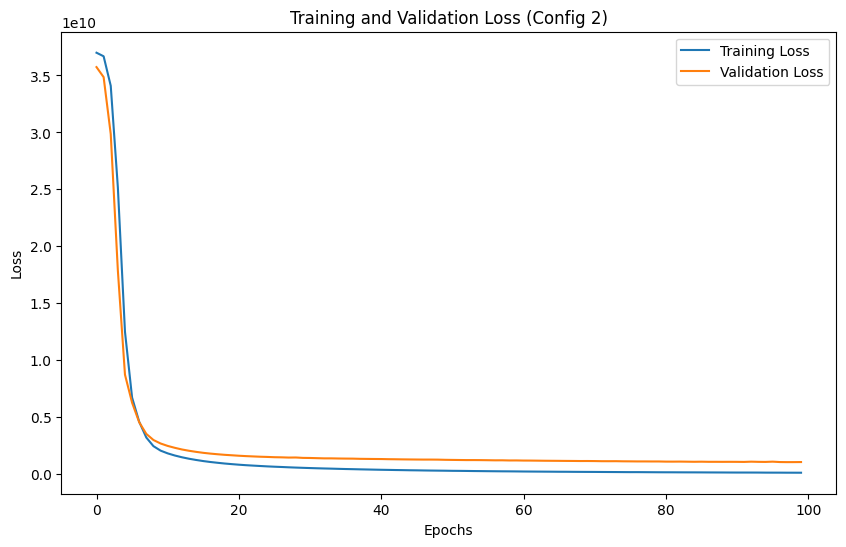

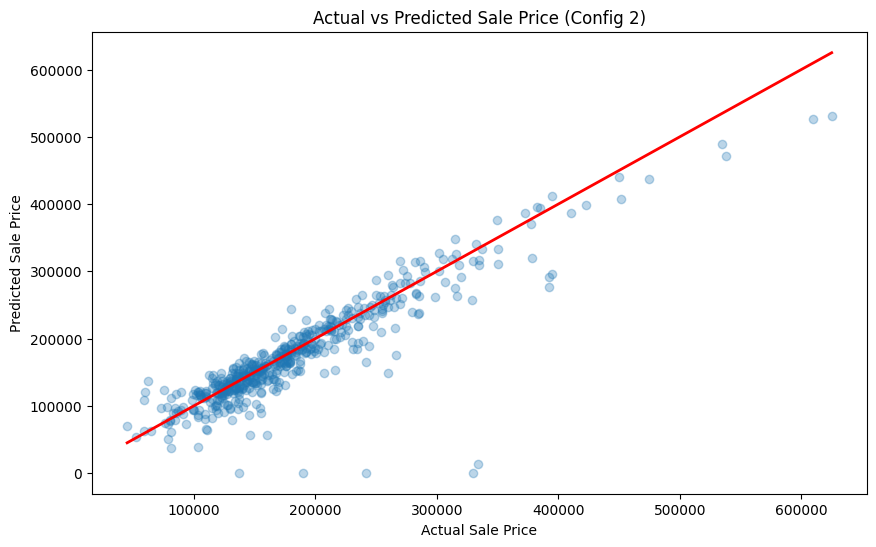

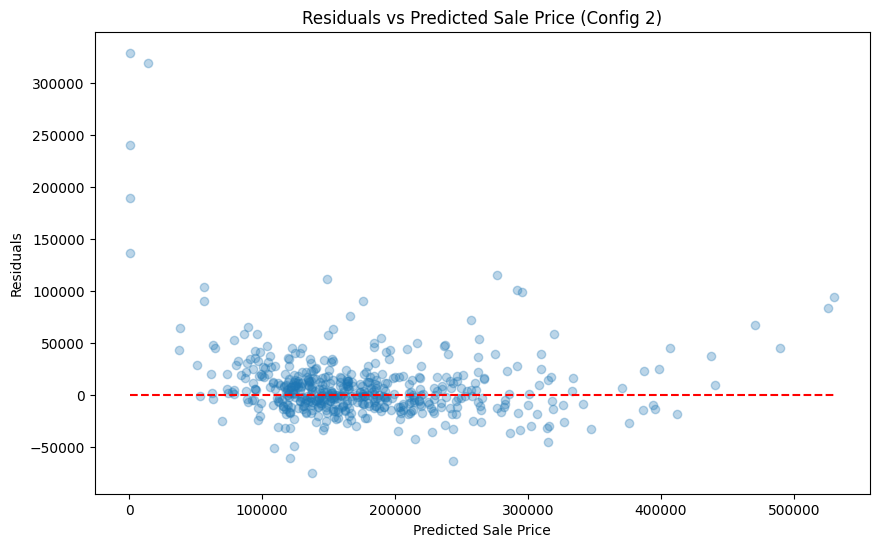

Configuration 3: {'layers': [64, 32, 32, 16], 'activation': 'relu', 'optimizer': 'adam'}
MSE: 1165174254.9094164, R^2: 0.8105927393957113



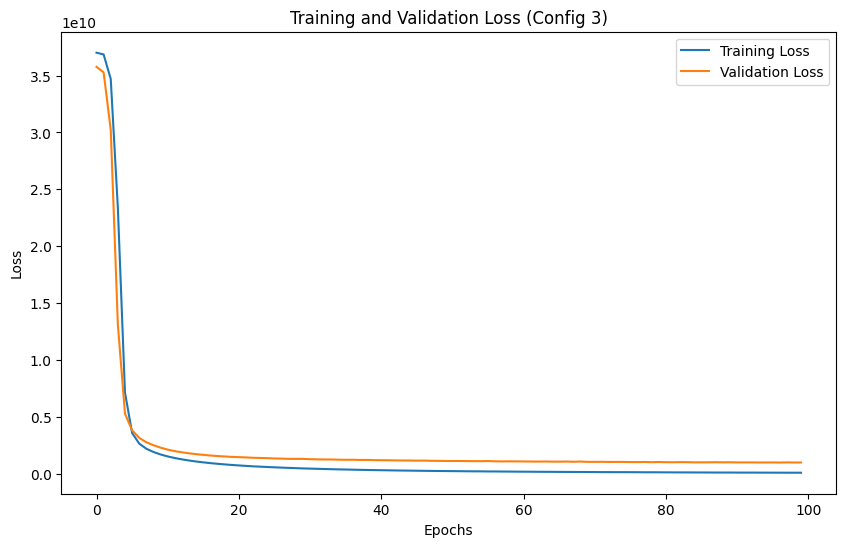

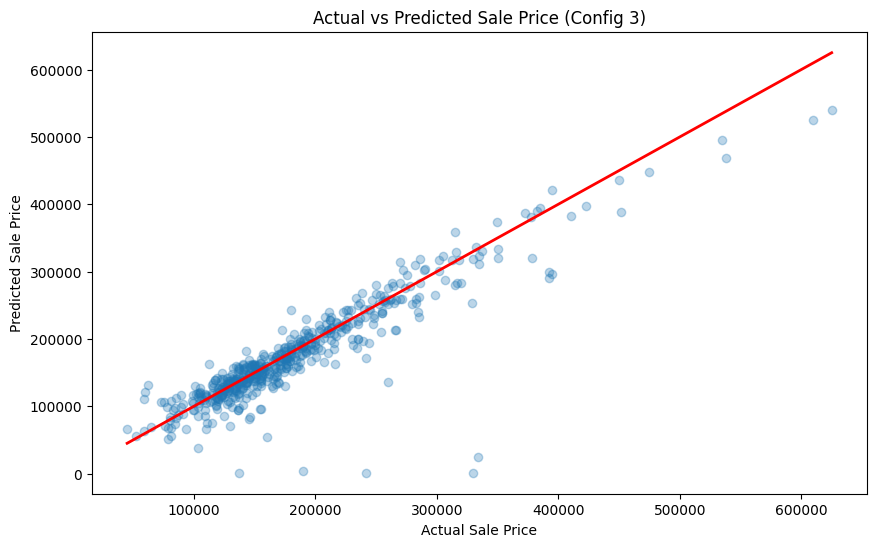

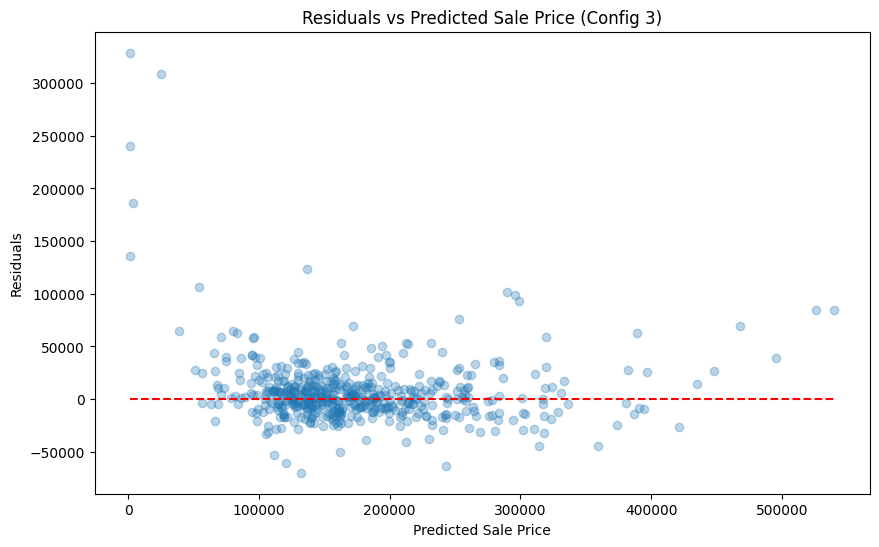

Configuration 4: {'layers': [64, 64], 'activation': 'tanh', 'optimizer': 'adam'}
MSE: 39488731640.84702, R^2: -5.41917074061356



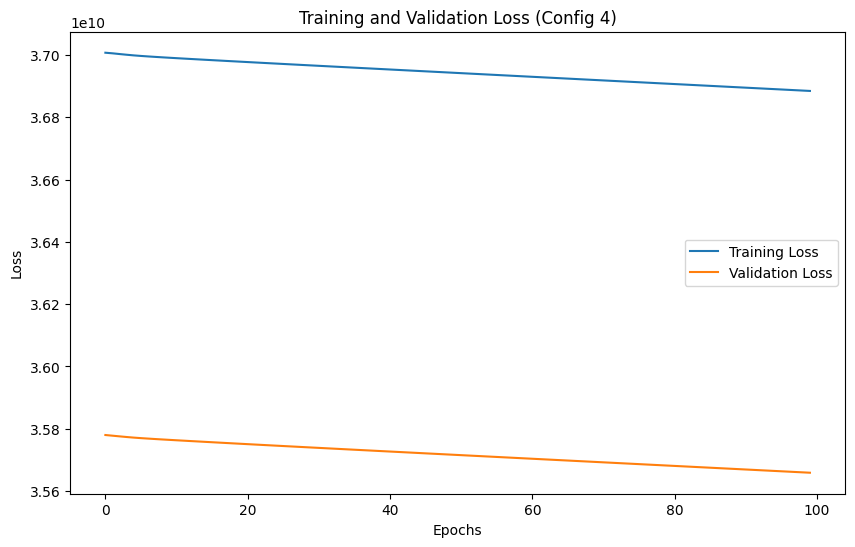

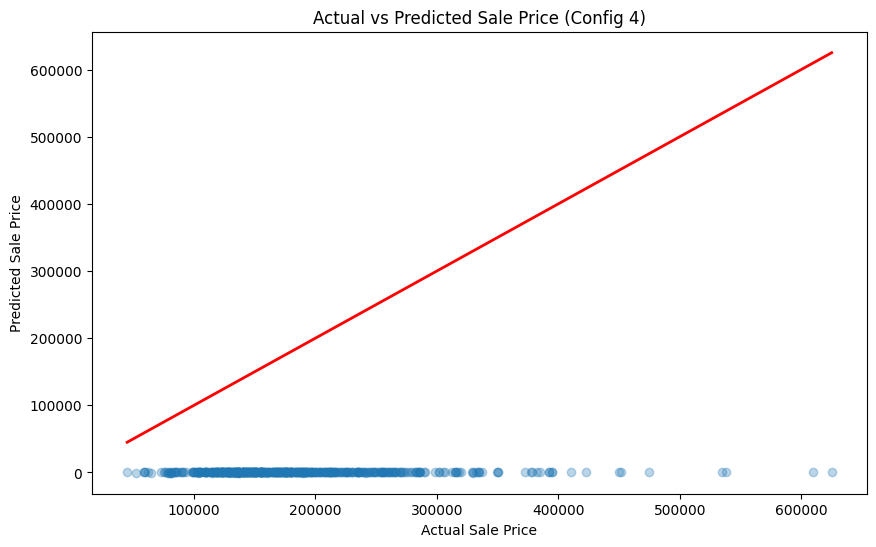

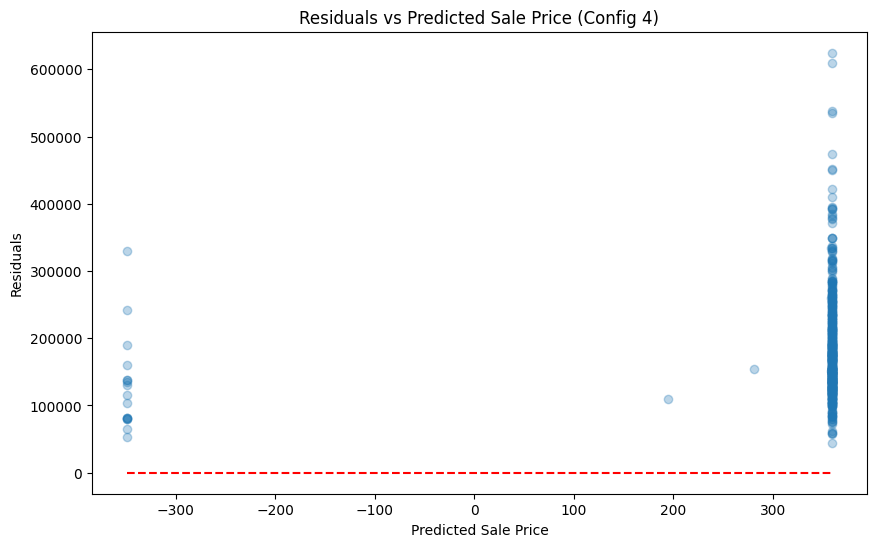

Configuration 5: {'layers': [64, 64], 'activation': 'relu', 'optimizer': 'sgd'}
MSE: 6181815335.760373, R^2: -0.004897510715236697



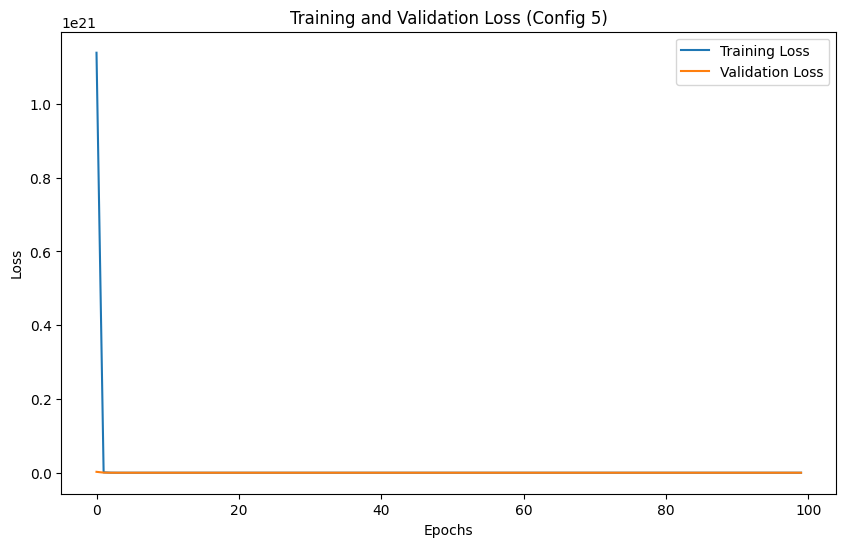

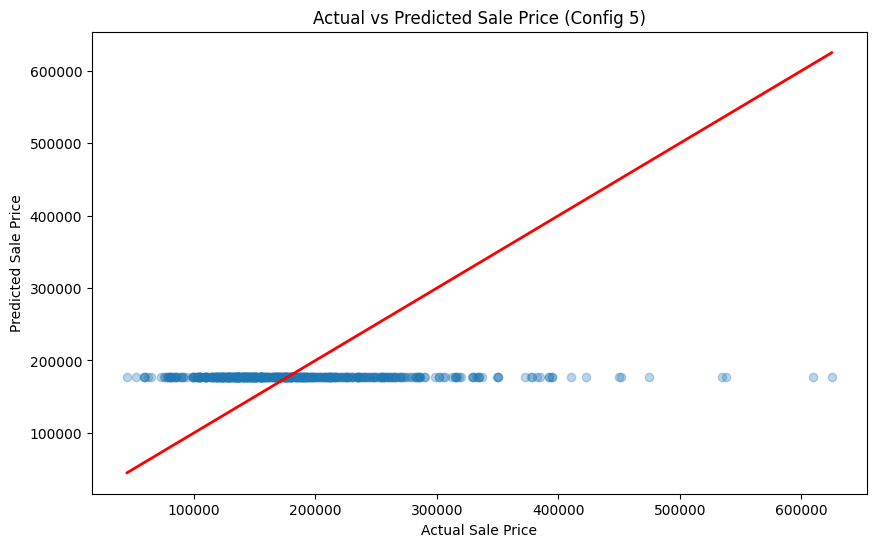

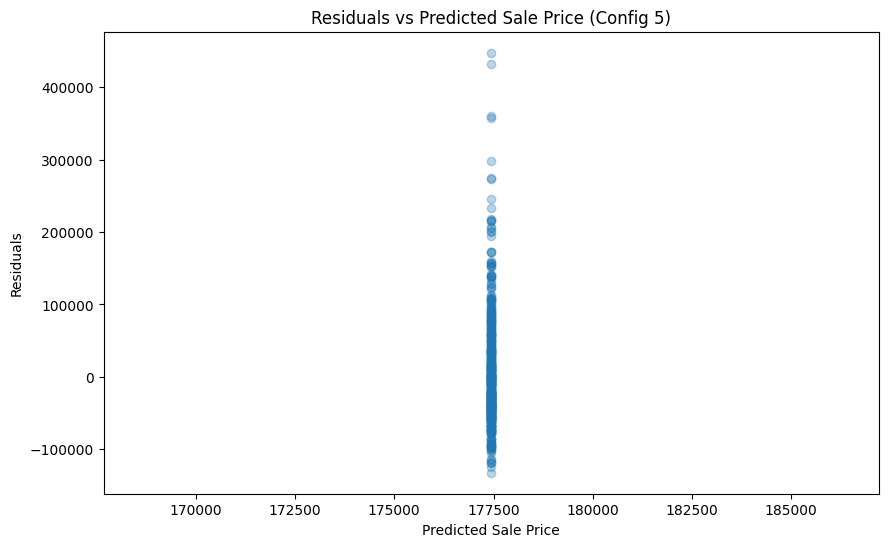

In [ ]:

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Scale the features
scaler = StandardScaler()
features_all_scaled = scaler.fit_transform(features_all_original_imputed)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_scaled, target_original, test_size=0.2, random_state=42)

def build_and_train_model(layers, activation, optimizer, epochs=100):
    model = Sequential()
    model.add(Dense(layers[0], activation=activation, input_shape=(X_train_all.shape[1],)))

    for layer_size in layers[1:]:
        model.add(Dense(layer_size, activation=activation))

    model.add(Dense(1))

    model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(X_train_all, y_train_all, epochs=epochs, validation_split=0.2, verbose=0)

    y_pred = model.predict(X_test_all).flatten()

    mse = mean_squared_error(y_test_all, y_pred)
    r2 = r2_score(y_test_all, y_pred)

    return history, mse, r2, y_pred

# Example configurations
configurations = [
    {'layers': [64, 64], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [128, 64, 32], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [64, 32, 32, 16], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [64, 64], 'activation': 'tanh', 'optimizer': 'adam'},
    {'layers': [64, 64], 'activation': 'relu', 'optimizer': 'sgd'}
]

results = []

for config in configurations:
    history, mse, r2, y_pred = build_and_train_model(**config)
    results.append((config, history, mse, r2, y_pred))

# Plot the results
for i, (config, history, mse, r2, y_pred) in enumerate(results):
    print(f"Configuration {i+1}: {config}")
    print(f"MSE: {mse}, R^2: {r2}\n")

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss (Config {i+1})')
    plt.legend()
    plt.show()

    # Plot actual vs predicted sale prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_all, y_pred, alpha=0.3)
    plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title(f'Actual vs Predicted Sale Price (Config {i+1})')
    plt.show()

    # Plot residuals
    residuals = y_test_all - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Predicted Sale Price (Config {i+1})')
    plt.show()


# The following does the same as above but manages to get an R^2 score of .93 using parameters Best R^2 Score: 0.9295717359695008
Best parameters: {'n_layers': 2, 'n_neurons': 128, 'learning_rate': 0.01, 'activation': 'relu'}

In [ ]:

data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a dense format
X_preprocessed = X_preprocessed.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define a function to build the model with different hyperparameters
def build_model(n_layers, n_neurons, learning_rate, activation):
    model = Sequential()
    model.add(Dense(n_neurons, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Hyperparameters to try
n_layers_options = [2, 3]
n_neurons_options = [32, 64, 128]
learning_rate_options = [0.001, 0.01]
activation_options = ['relu', 'tanh']

# Track the best model and its parameters
best_r2 = -np.inf
best_params = {}

# Perform the grid search
for n_layers in n_layers_options:
    for n_neurons in n_neurons_options:
        for learning_rate in learning_rate_options:
            for activation in activation_options:
                print(f'Training model with {n_layers} layers, {n_neurons} neurons, learning rate {learning_rate}, activation {activation}')
                model = build_model(n_layers, n_neurons, learning_rate, activation)
                history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
                y_pred = model.predict(X_test)
                r2 = r2_score(y_test, y_pred)
                print(f'R^2 Score: {r2}')
                if r2 > best_r2:
                    best_r2 = r2
                    best_params = {
                        'n_layers': n_layers,
                        'n_neurons': n_neurons,
                        'learning_rate': learning_rate,
                        'activation': activation
                    }

print(f'Best R^2 Score: {best_r2}')
print(f'Best parameters: {best_params}')

# Train the best model again with the best parameters
best_model = build_model(best_params['n_layers'], best_params['n_neurons'], best_params['learning_rate'], best_params['activation'])
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)
test_loss, test_mae = best_model.evaluate(X_test, y_test)
y_pred = best_model.predict(X_test)
best_r2 = r2_score(y_test, y_pred)

print(f'Test Loss: {test_loss}, Test MAE: {test_mae}, Best R^2 Score: {best_r2}')

Training model with 2 layers, 32 neurons, learning rate 0.001, activation relu
17/17 [==============================] - 0s 1ms/step
R^2 Score: 0.813935456521351
Training model with 2 layers, 32 neurons, learning rate 0.001, activation tanh
17/17 [==============================] - 0s 1ms/step
R^2 Score: -5.433919636145582
Training model with 2 layers, 32 neurons, learning rate 0.01, activation relu
17/17 [==============================] - 0s 1ms/step
R^2 Score: 0.9177653146407934
Training model with 2 layers, 32 neurons, learning rate 0.01, activation tanh
17/17 [==============================] - 0s 1ms/step
R^2 Score: -5.3882874853776
Training model with 2 layers, 64 neurons, learning rate 0.001, activation relu
17/17 [==============================] - 0s 1ms/step
R^2 Score: 0.8592669939875828
Training model with 2 layers, 64 neurons, learning rate 0.001, activation tanh
17/17 [==============================] - 0s 1ms/step
R^2 Score: -5.428778292407197
Training model with 2 layers, 64 

17/17 [==============================] - 0s 1ms/step
Configuration 1: {'layers': 2, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}
MSE: 1063116546.3886714, R^2: 0.8271829368816386



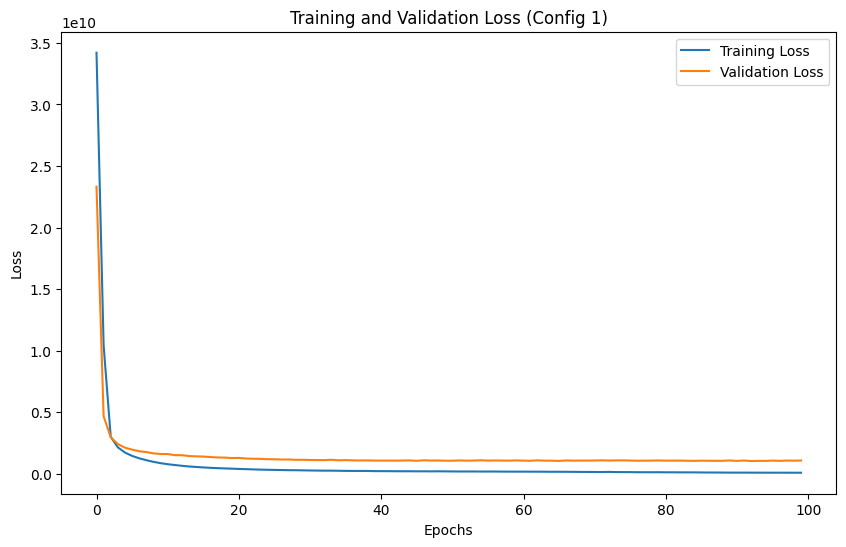

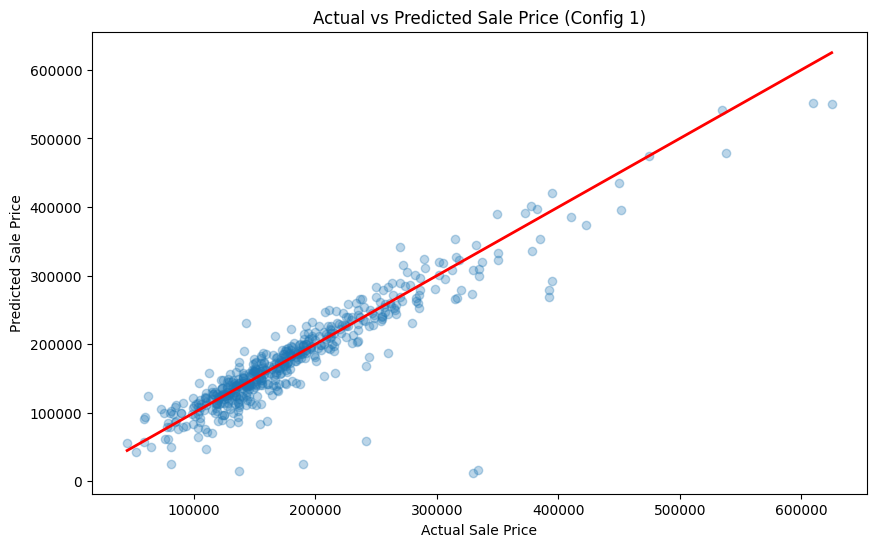

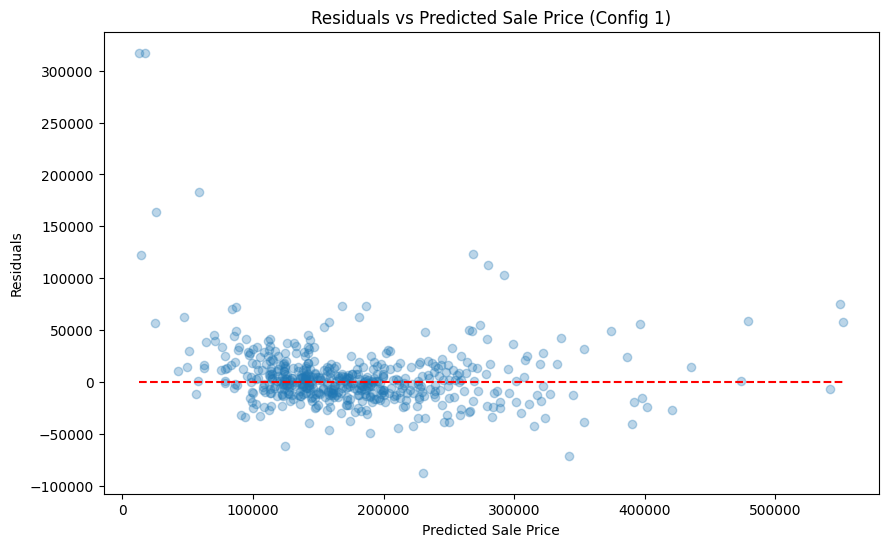

Configuration 2: {'layers': 3, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}
MSE: 933280167.0722932, R^2: 0.8482887524534101



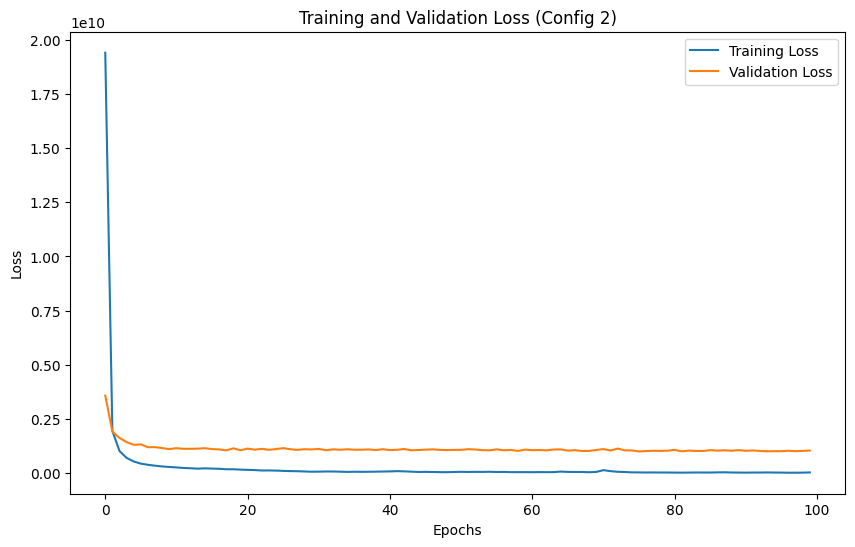

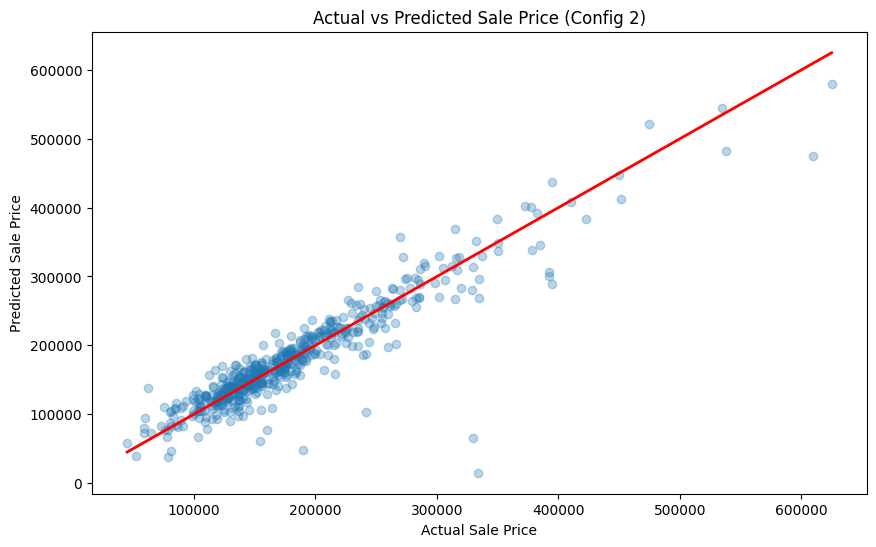

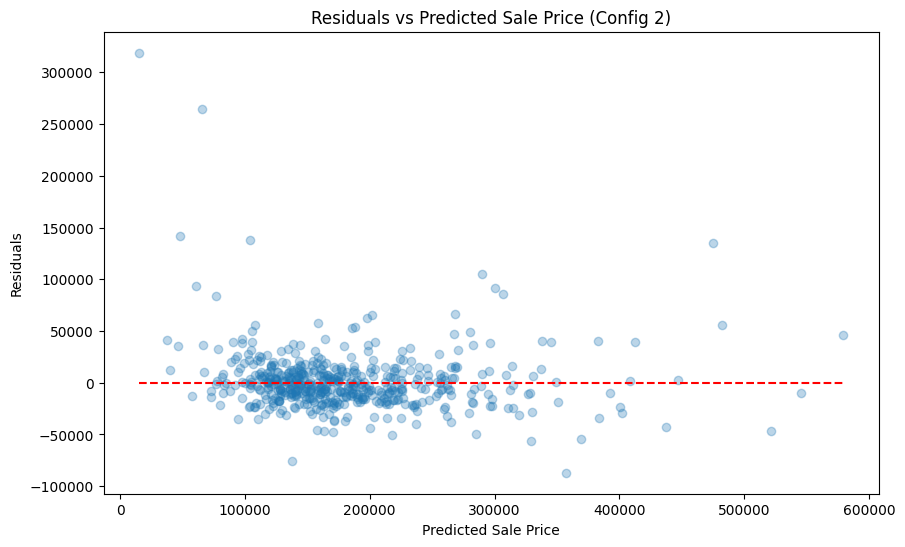

Configuration 3: {'layers': 4, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}
MSE: 981358627.2634392, R^2: 0.8404732609932205



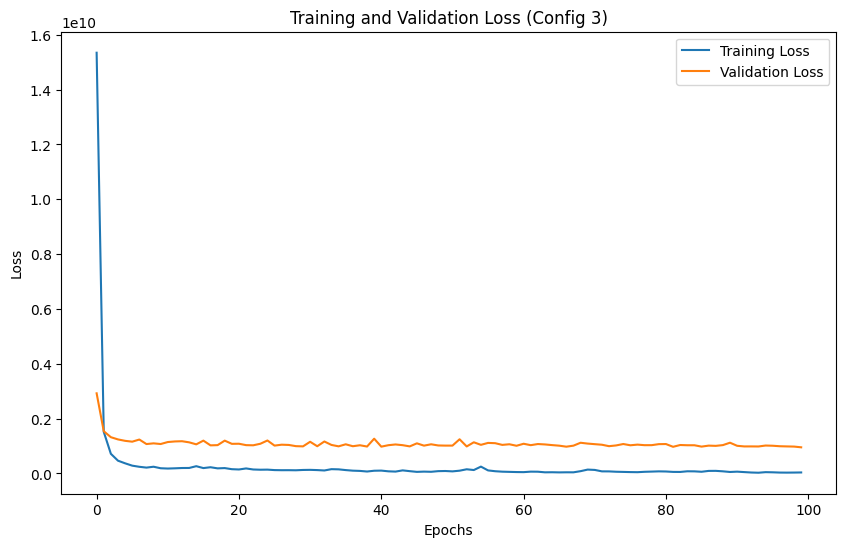

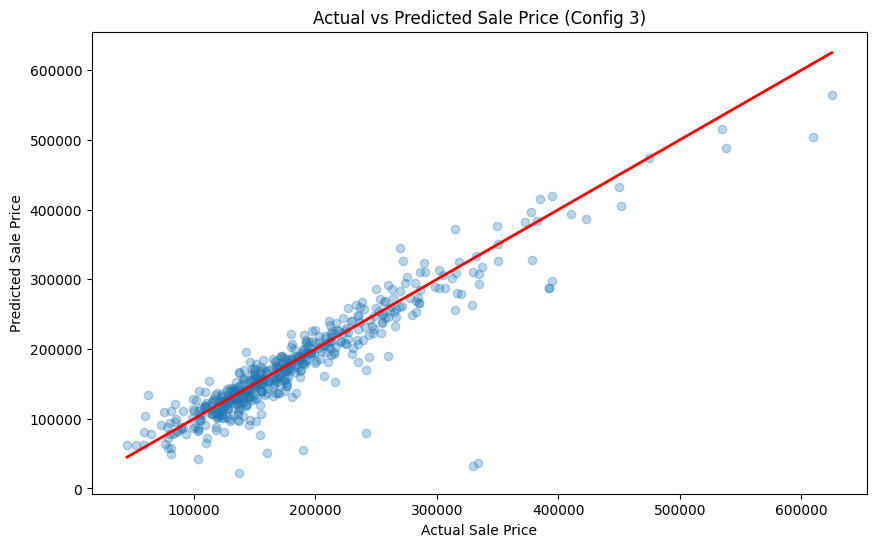

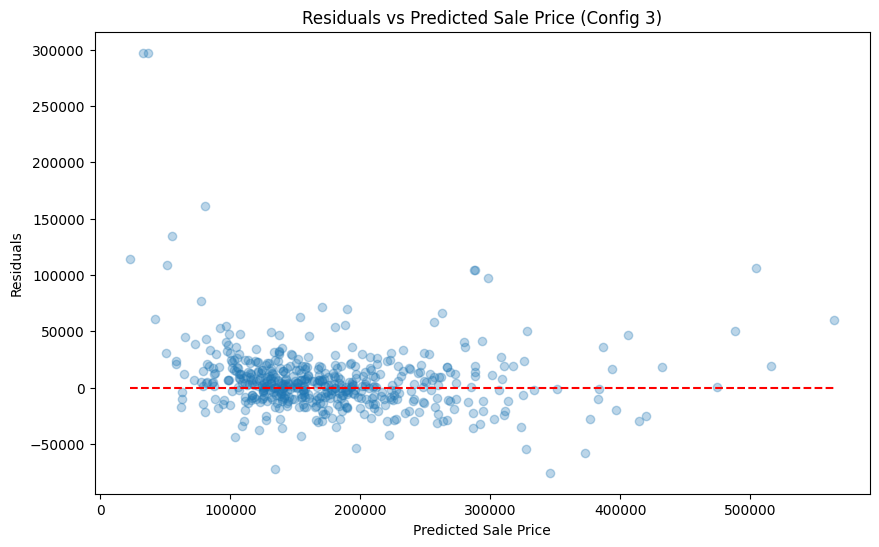

In [ ]:

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Scale the features
scaler = StandardScaler()
features_all_scaled = scaler.fit_transform(features_all_original_imputed)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_scaled, target_original, test_size=0.2, random_state=42)

def build_and_train_model(layers, neurons, activation, optimizer, epochs=100, learning_rate=0.01):
    model = Sequential()
    model.add(Input(shape=(X_train_all.shape[1],)))

    for _ in range(layers):
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(1))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

    history = model.fit(X_train_all, y_train_all, epochs=epochs, validation_split=0.2, verbose=0)

    y_pred = model.predict(X_test_all).flatten()

    mse = mean_squared_error(y_test_all, y_pred)
    r2 = r2_score(y_test_all, y_pred)

    return history, mse, r2, y_pred

# Example configurations
configurations = [
    {'layers': 2, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01},
    {'layers': 3, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01},
    {'layers': 4, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}
]

results = []

for config in configurations:
    history, mse, r2, y_pred = build_and_train_model(**config)
    results.append((config, history, mse, r2, y_pred))

# Plot the results
for i, (config, history, mse, r2, y_pred) in enumerate(results):
    print(f"Configuration {i+1}: {config}")
    print(f"MSE: {mse}, R^2: {r2}\n")

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss (Config {i+1})')
    plt.legend()
    plt.show()

    # Plot actual vs predicted sale prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_all, y_pred, alpha=0.3)
    plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title(f'Actual vs Predicted Sale Price (Config {i+1})')
    plt.show()

    # Plot residuals
    residuals = y_test_all - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Predicted Sale Price (Config {i+1})')
    plt.show()


# The following neural network Best R^2 Score: 0.9306689990447279
# Best parameters: {'n_layers': 3, 'n_neurons': 32, 'learning_rate': 0.01, 'activation': 'relu'}

Training model with 2 layers, 32 neurons, learning rate 0.001, activation relu
17/17 [==============================] - 0s 1ms/step
R^2 Score: 0.8013720435920478
Training model with 2 layers, 32 neurons, learning rate 0.001, activation tanh
17/17 [==============================] - 0s 1ms/step
R^2 Score: -5.433939854258301
Training model with 2 layers, 32 neurons, learning rate 0.01, activation relu
17/17 [==============================] - 0s 1ms/step
R^2 Score: 0.9240101174228714
Training model with 2 layers, 32 neurons, learning rate 0.01, activation tanh
17/17 [==============================] - 0s 1ms/step
R^2 Score: -5.388325455673833
Training model with 2 layers, 64 neurons, learning rate 0.001, activation relu
17/17 [==============================] - 0s 1ms/step
R^2 Score: 0.8661876231603522
Training model with 2 layers, 64 neurons, learning rate 0.001, activation tanh
17/17 [==============================] - 0s 1ms/step
R^2 Score: -5.428854805652272
Training model with 2 layers, 

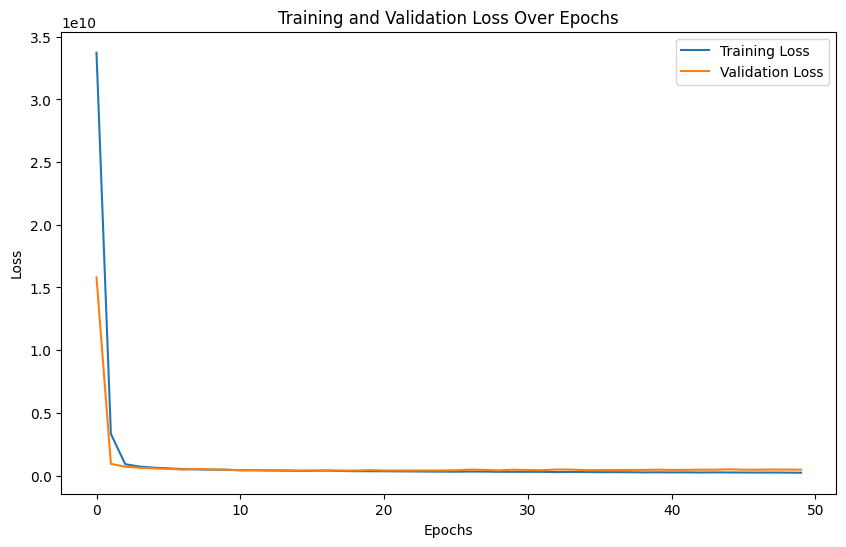

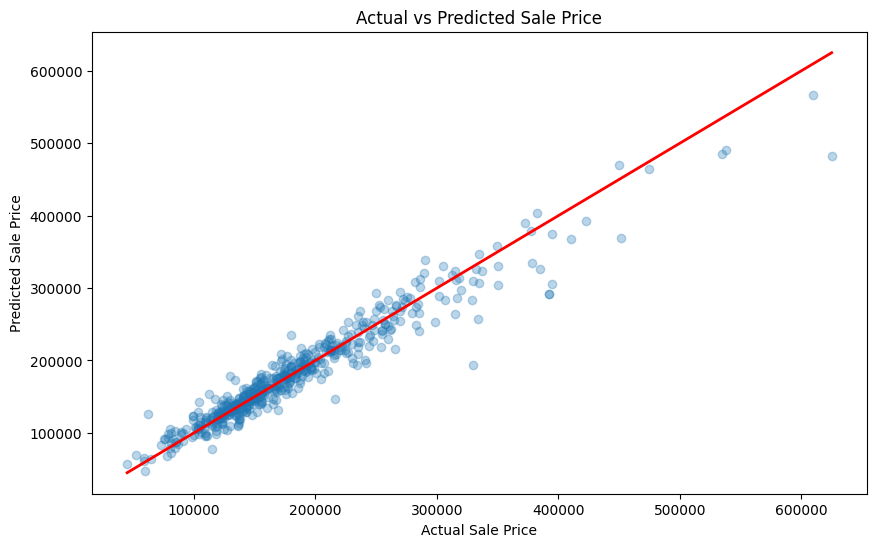

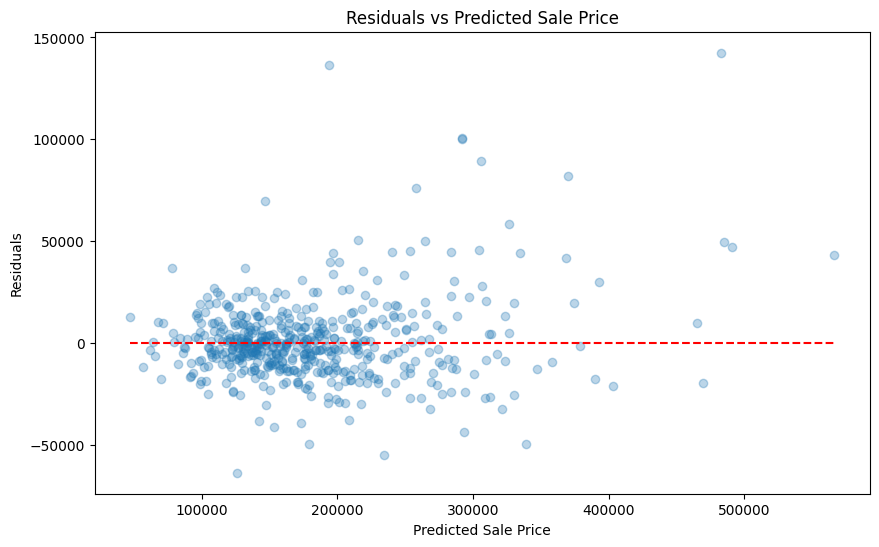

In [ ]:
# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a dense format
X_preprocessed = X_preprocessed.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define a function to build the model with different hyperparameters
def build_model(n_layers, n_neurons, learning_rate, activation):
    model = Sequential()
    model.add(Dense(n_neurons, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Hyperparameters to try
n_layers_options = [2, 3]
n_neurons_options = [32, 64, 128]
learning_rate_options = [0.001, 0.01]
activation_options = ['relu', 'tanh']

# Track the best model and its parameters
best_r2 = -np.inf
best_params = {}

# Perform the grid search
for n_layers in n_layers_options:
    for n_neurons in n_neurons_options:
        for learning_rate in learning_rate_options:
            for activation in activation_options:
                print(f'Training model with {n_layers} layers, {n_neurons} neurons, learning rate {learning_rate}, activation {activation}')
                model = build_model(n_layers, n_neurons, learning_rate, activation)
                history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
                y_pred = model.predict(X_test).flatten()
                r2 = r2_score(y_test, y_pred)
                print(f'R^2 Score: {r2}')
                if r2 > best_r2:
                    best_r2 = r2
                    best_params = {
                        'n_layers': n_layers,
                        'n_neurons': n_neurons,
                        'learning_rate': learning_rate,
                        'activation': activation
                    }

print(f'Best R^2 Score: {best_r2}')
print(f'Best parameters: {best_params}')

# Train the best model again with the best parameters
best_model = build_model(best_params['n_layers'], best_params['n_neurons'], best_params['learning_rate'], best_params['activation'])
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)
test_loss, test_mae = best_model.evaluate(X_test, y_test)
y_pred = best_model.predict(X_test).flatten()
best_r2 = r2_score(y_test, y_pred)

print(f'Test Loss: {test_loss}, Test MAE: {test_mae}, Best R^2 Score: {best_r2}')

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Plot actual vs predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')
plt.show()


# The following returns to linear regression and selects the columns using step forward selection that are best for a linear model

In [ ]:

# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr_model = LinearRegression()

# Define the forward selection feature selector
sfs = SequentialFeatureSelector(lr_model, direction='forward', scoring='r2', cv=5, n_jobs=-1)

# Fit the feature selector
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = sfs.get_support()

# Transform the training and testing sets to include only selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Train the model on the selected features
lr_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_selected)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f'Selected Features: {selected_features}')
print(f'R^2 Score: {r2}')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Selected Features: [ True  True False  True  True  True  True  True  True  True  True  True
  True False False False  True False False False  True  True False  True
 False False  True False False  True False  True False  True False False
  True False False  True False  True False False False False False False
 False False False False  True False  True False False  True  True  True
  True  True False False  True  True  True  True  True False False  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True False False  True  True False False False False  True
  True False False False False False False False  True False False  True
 False False  True  True  True  True  True False False  True False False
 False False False False  True False False False False  True  True False
 False  True  True False  True False False  True  True False False  True
  True  True  True  True False False False  True False False  True  True
 False False False  True False  

# We can see that the R^2 score for a linear method using step forward selection for selecting features gets and R^2 score of 0.9187

# Below we train the most effective neural network from above with an R^2 score of .93 and train it using the selected features from forward step selection

Epoch 1/50
52/52 [==============================] - 1s 7ms/step - loss: 36223758336.0000 - mae: 174830.2812 - val_loss: 31881867264.0000 - val_mae: 165672.5156
Epoch 2/50
52/52 [==============================] - 0s 4ms/step - loss: 20507209728.0000 - mae: 122305.3672 - val_loss: 4229888000.0000 - val_mae: 47246.1797
Epoch 3/50
52/52 [==============================] - 0s 4ms/step - loss: 1984482944.0000 - mae: 30170.4277 - val_loss: 1179821184.0000 - val_mae: 24459.6035
Epoch 4/50
52/52 [==============================] - 0s 4ms/step - loss: 1144418048.0000 - mae: 23120.7031 - val_loss: 990273728.0000 - val_mae: 22898.5762
Epoch 5/50
52/52 [==============================] - 0s 4ms/step - loss: 964999360.0000 - mae: 21541.0039 - val_loss: 861326400.0000 - val_mae: 21141.0918
Epoch 6/50
52/52 [==============================] - 0s 4ms/step - loss: 855273600.0000 - mae: 20103.9824 - val_loss: 782318144.0000 - val_mae: 20156.4062
Epoch 7/50
52/52 [==============================] - 0s 4ms/step

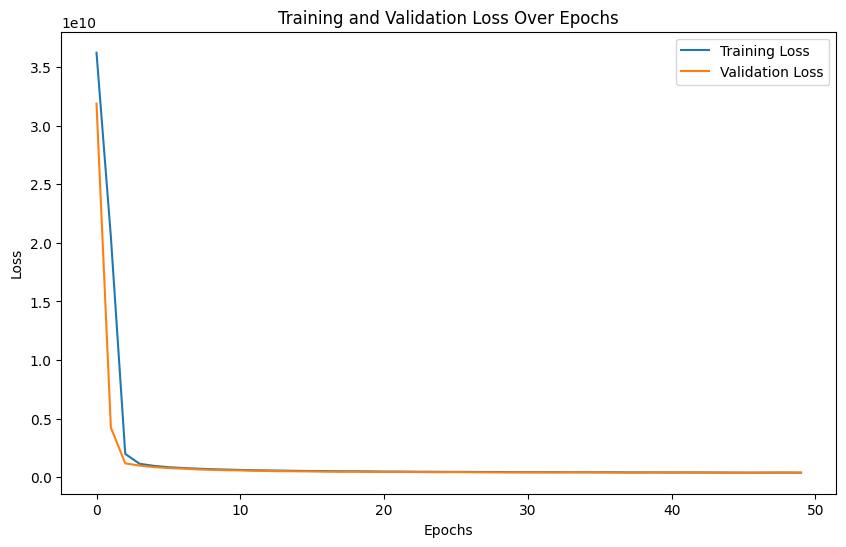

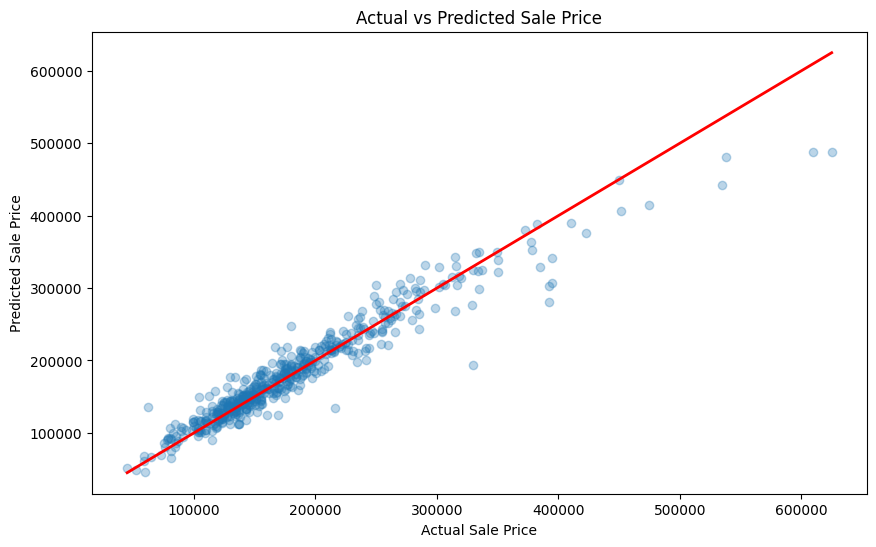

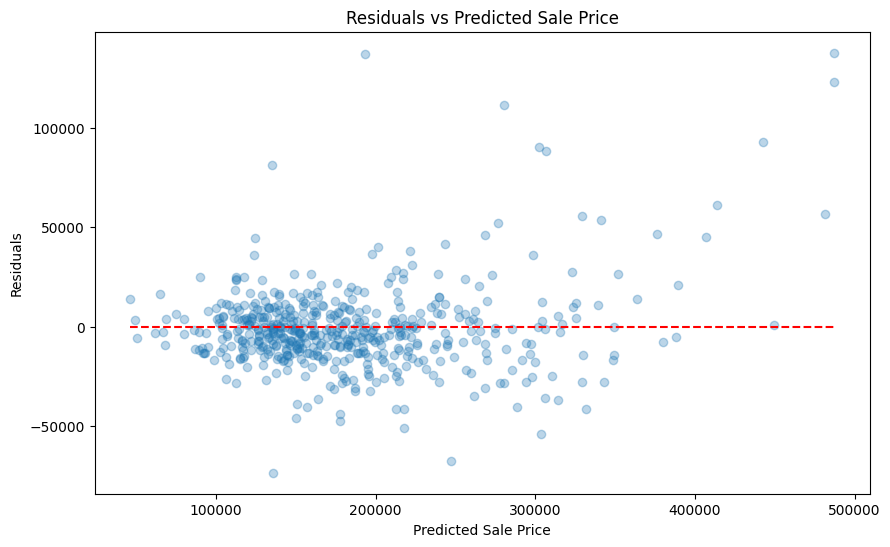

In [ ]:

def build_model(n_layers, n_neurons, learning_rate, activation):
    model = Sequential()
    model.add(Dense(n_neurons, activation=activation, input_shape=(X_train_selected.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Convert sparse matrix to dense
X_train_selected_dense = X_train_selected.toarray()
X_test_selected_dense = X_test_selected.toarray()

# Parameters for the neural network
n_layers = 2
n_neurons = 64
learning_rate = 0.01
activation = 'relu'
epochs = 50

# Build and train the neural network
nn_model = build_model(n_layers, n_neurons, learning_rate, activation)
history = nn_model.fit(X_train_selected_dense, y_train, validation_split=0.2, epochs=epochs, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test_selected_dense).flatten()

# Calculate the R^2 score
r2_nn = r2_score(y_test, y_pred_nn)

print(f'R^2 Score of the neural network: {r2_nn}')

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Plot actual vs predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

# Plot residuals
residuals = y_test - y_pred_nn
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_nn.min(), xmax=y_pred_nn.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')
plt.show()


# R^2 Score of the neural network: 0.922, a slightly higher score than the linear model using SFS and slightly lower than the .93 of neural networks trained on all features

# Below we have a neural network using all the features again getting a score of .93 or better on R^2 using adam and relu, several plots show important features of the training process

Epoch 1/50
52/52 [==============================] - 2s 6ms/step - loss: 35844349952.0000 - mae: 173855.2031 - val_loss: 30276319232.0000 - val_mae: 160864.1406
Epoch 2/50
52/52 [==============================] - 0s 4ms/step - loss: 16265819136.0000 - mae: 101230.3438 - val_loss: 1787140992.0000 - val_mae: 27464.9473
Epoch 3/50
52/52 [==============================] - 0s 4ms/step - loss: 1561178624.0000 - mae: 27079.1602 - val_loss: 971220224.0000 - val_mae: 20987.1758
Epoch 4/50
52/52 [==============================] - 0s 4ms/step - loss: 1008870144.0000 - mae: 20667.7715 - val_loss: 815120320.0000 - val_mae: 20010.2461
Epoch 5/50
52/52 [==============================] - 0s 4ms/step - loss: 856376960.0000 - mae: 18945.9531 - val_loss: 735207104.0000 - val_mae: 18858.6250
Epoch 6/50
52/52 [==============================] - 0s 4ms/step - loss: 763123840.0000 - mae: 17818.5020 - val_loss: 675729728.0000 - val_mae: 18068.1055
Epoch 7/50
52/52 [==============================] - 0s 4ms/step 

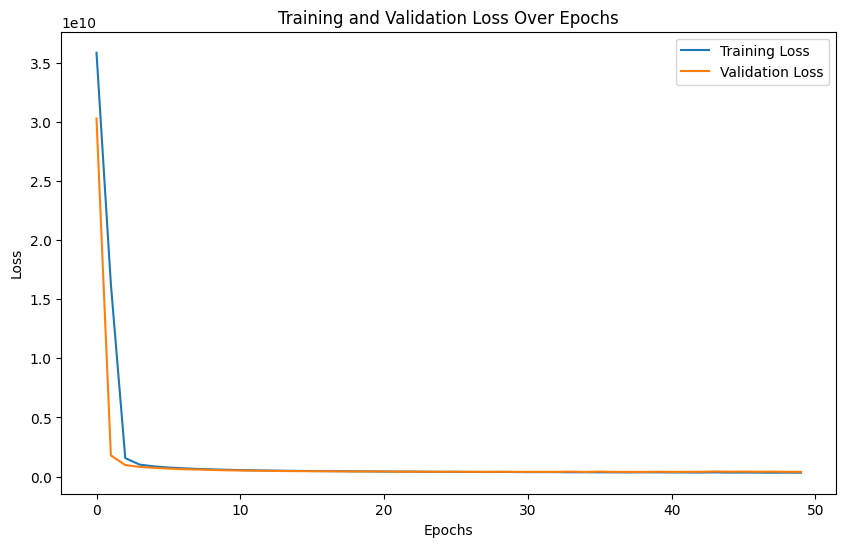

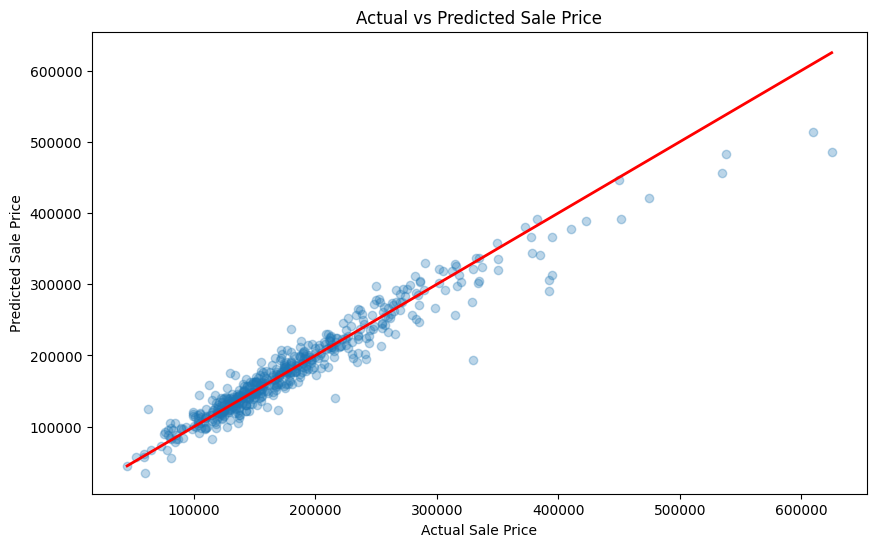

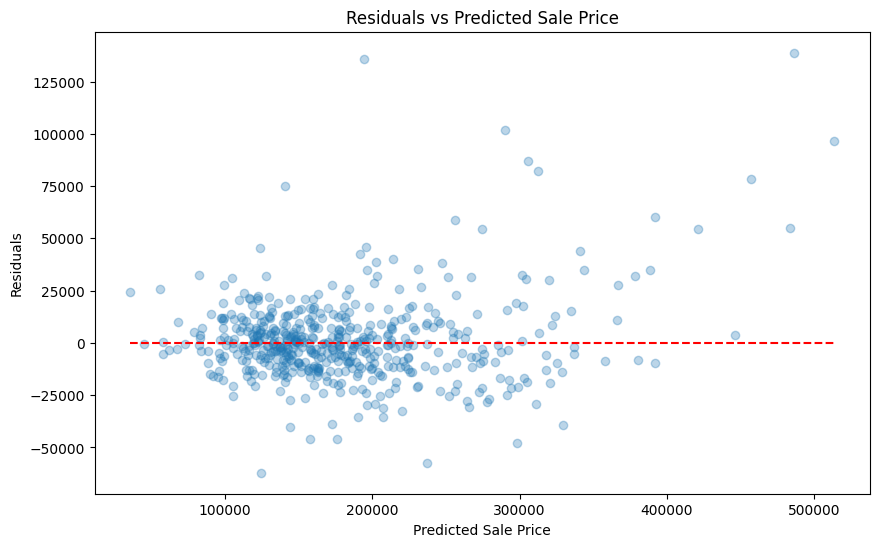

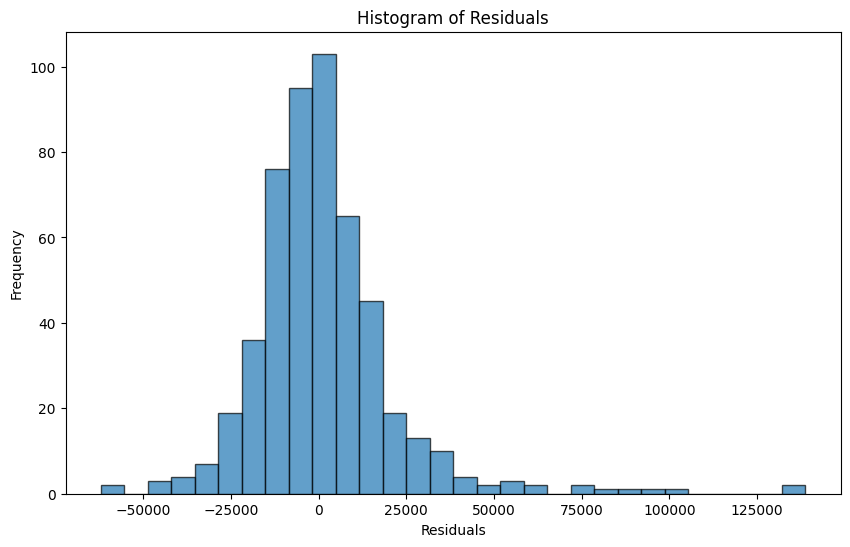

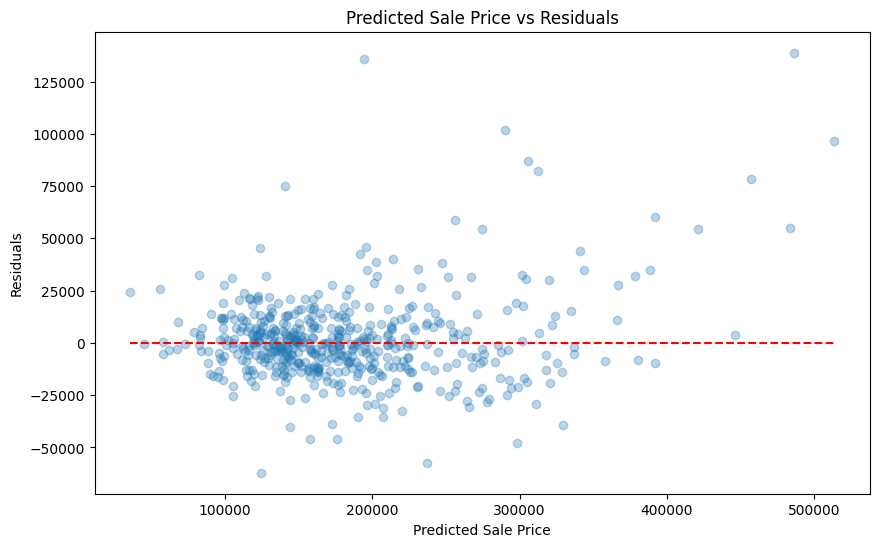

In [ ]:

# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a dense format
X_preprocessed = X_preprocessed.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the neural network model
def build_model(n_layers, n_neurons, learning_rate, activation):
    model = Sequential()
    model.add(Dense(n_neurons, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Parameters for the neural network
n_layers = 2
n_neurons = 64
learning_rate = 0.01
activation = 'relu'
epochs = 50

# Build and train the neural network
nn_model = build_model(n_layers, n_neurons, learning_rate, activation)
history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test).flatten()

# Calculate the R^2 score
r2_nn = r2_score(y_test, y_pred_nn)

print(f'R^2 Score of the neural network: {r2_nn}')

# 1. Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# 2. Plot actual vs predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

# 3. Plot residuals
residuals = y_test - y_pred_nn
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_nn.min(), xmax=y_pred_nn.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')
plt.show()

# 4. Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# 5. Scatter plot of predicted prices vs residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn, residuals, alpha=0.3)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Predicted Sale Price vs Residuals')
plt.hlines(y=0, xmin=y_pred_nn.min(), xmax=y_pred_nn.max(), colors='red', linestyles='dashed')
plt.show()



# Finally we take a look at k-fold cross validation using k=5 to see estimate the test R^2 from the training data

In [ ]:

# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Define the linear regression model
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define the cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=kfold, scoring=make_scorer(r2_score))

# Print the R^2 scores for each fold and the average R^2 score
print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Mean R^2 Score: {cv_scores.mean()}')
print(f'Standard Deviation of R^2 Scores: {cv_scores.std()}')


Cross-Validation R^2 Scores: [0.91425092 0.86891308 0.91833654 0.92146186 0.88577595]
Mean R^2 Score: 0.9017476707398947
Standard Deviation of R^2 Scores: 0.02075272188984166


# I hoped you enjoyed my Jupyter Notebook for my NYC Data Science Academy project